In [3]:
# 라이브러리 불러오기
import pandas as pd  # 데이터 처리 라이브러리
import numpy as np  # 수학 계산 라이브러리
from sklearn.ensemble import RandomForestRegressor  # 랜덤포레스트 모델
import shap  # SHAP 분석 라이브러리
import matplotlib.pyplot as plt  # 시각화 라이브러리
from matplotlib import rc  # 한글 폰트 설정
from sklearn.preprocessing import StandardScaler  # Z-score 정규화

In [4]:

# 한글 깨짐 방지 설정
rc('font', family='Malgun Gothic')  # Windows 환경에서는 '맑은 고딕' 사용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스(-) 기호 깨짐 방지

# 데이터 로드 (파일 경로 수정 필요)
file_path = "D:/MySQL/Uploads/electric_ai_zscore_with_cause.csv"  # 파일 경로
data = pd.read_csv(file_path)

# 데이터 샘플 확인
print("데이터 샘플 확인:")
print(data.head())

데이터 샘플 확인:
  region_province cause_subcategory  total_incidents  total_damage  \
0             강원도       절연열화에 의한 단락                6           491   
1             강원도           과부하/과전류                5       6173874   
2             강원도             미확인단락                3     102369533   
3             강원도         기타(전기적요인)                2      33864857   
4             강원도             누전,지락                1          4655   

    risk_score  z_total_incidents  z_total_damage  
0        491.0           0.298059       -0.404768  
1    6173874.0           0.092127       -0.373863  
2  102369533.0          -0.319736        0.107697  
3   33864857.0          -0.525667       -0.235241  
4       4655.0          -0.731599       -0.404747  


In [5]:

# 데이터 전처리 (Z-score 정규화된 데이터 사용)
data["z_total_incidents"] = pd.to_numeric(data["z_total_incidents"], errors="coerce")  # 정규화된 발생 건수
data["z_total_damage"] = pd.to_numeric(data["z_total_damage"], errors="coerce")  # 정규화된 피해 금액
data["risk_score"] = pd.to_numeric(data["risk_score"], errors="coerce")  # 위험 점수
data = data.dropna(subset=["z_total_incidents", "z_total_damage", "risk_score"])  # NaN 제거

# 독립변수(X)와 종속변수(y) 설정
X = data[["z_total_incidents", "z_total_damage"]]  # 정규화된 데이터 사용
y = data["risk_score"]  # 위험 점수 (예측할 변수)

# 랜덤포레스트 모델 학습
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X, y)

RandomForestRegressor(random_state=42)

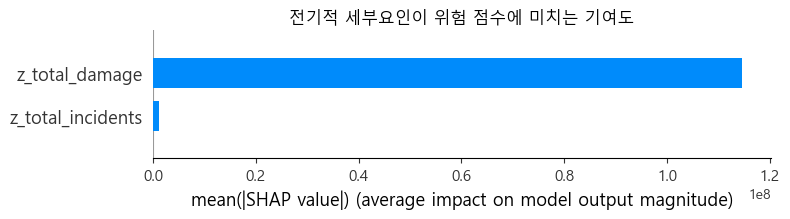

In [6]:
# SHAP 분석: 각 요인의 중요도 계산
explainer = shap.TreeExplainer(model, feature_perturbation="interventional")
shap_values = explainer(X)

# 요약 플롯 생성 (SHAP 분석 결과 시각화)
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title("전기적 세부요인이 위험 점수에 미치는 기여도")  # 그래프 제목 설정
plt.tight_layout()  # 그래프 여백 최적화
plt.show()  # 그래프 출력

In [8]:
print(data[["z_total_incidents", "z_total_damage", "risk_score"]].corr())

                   z_total_incidents  z_total_damage  risk_score
z_total_incidents            1.00000         0.59574     0.59574
z_total_damage               0.59574         1.00000     1.00000
risk_score                   0.59574         1.00000     1.00000


데이터 샘플:
  region_province cause_subcategory  total_incidents  total_damage  \
0             강원도       절연열화에 의한 단락                6           491   
1             강원도           과부하/과전류                5       6173874   
2             강원도             미확인단락                3     102369533   
3             강원도         기타(전기적요인)                2      33864857   
4             강원도             누전,지락                1          4655   

    risk_score  z_total_incidents  z_total_damage  
0        491.0           0.298059       -0.404768  
1    6173874.0           0.092127       -0.373863  
2  102369533.0          -0.319736        0.107697  
3   33864857.0          -0.525667       -0.235241  
4       4655.0          -0.731599       -0.404747  
📌 강원도 지역 SHAP 분석 진행 중...


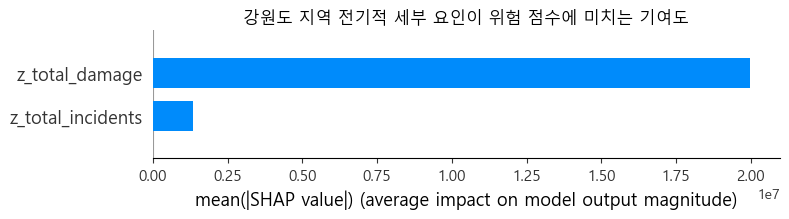

📌 경기도 지역 SHAP 분석 진행 중...


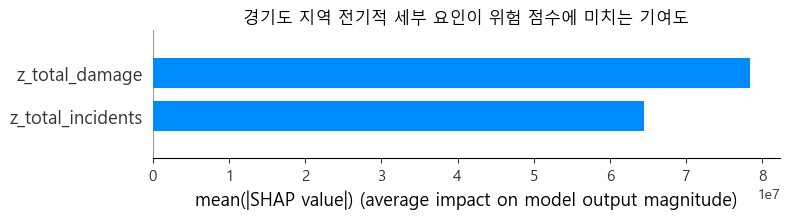

📌 경상남도 지역 SHAP 분석 진행 중...


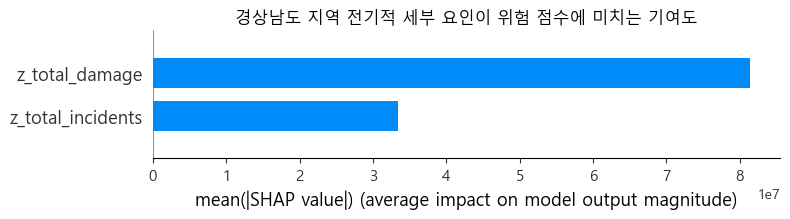

📌 경상북도 지역 SHAP 분석 진행 중...


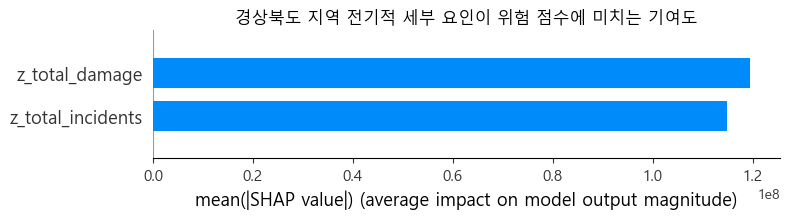

📌 광주광역시 지역 SHAP 분석 진행 중...


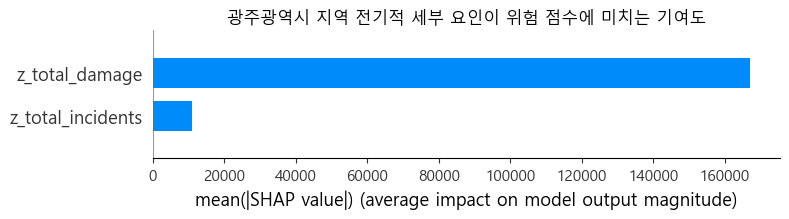

📌 대구광역시 지역 SHAP 분석 진행 중...


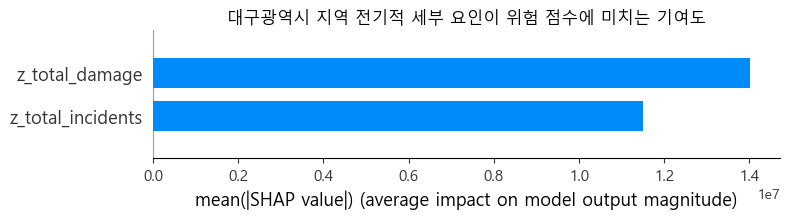

📌 대전광역시 지역 SHAP 분석 진행 중...


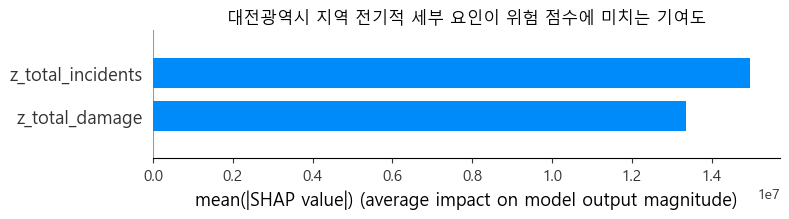

📌 부산광역시 지역 SHAP 분석 진행 중...


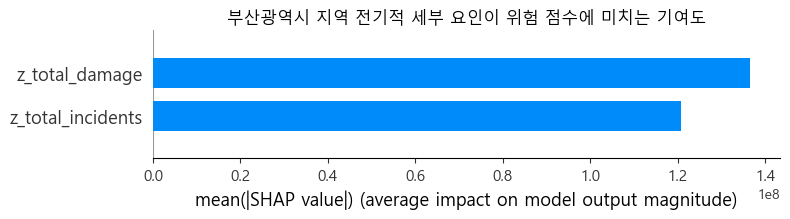

📌 서울특별시 지역 SHAP 분석 진행 중...


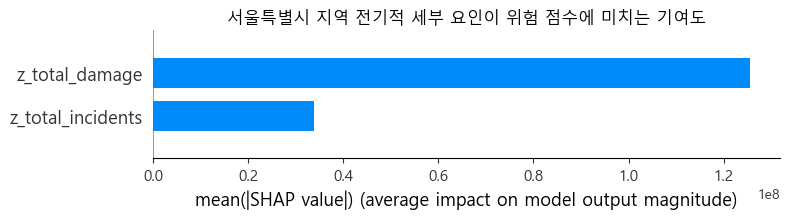

📌 세종특별자치시 지역 SHAP 분석 진행 중...


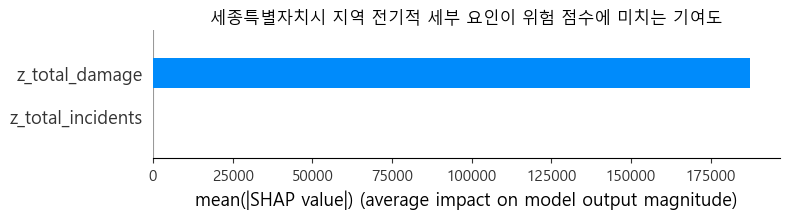

📌 울산광역시 지역 SHAP 분석 진행 중...


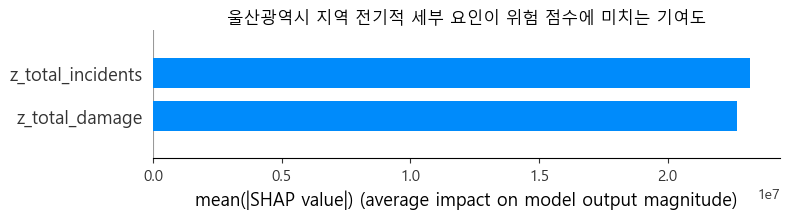

📌 인천광역시 지역 SHAP 분석 진행 중...


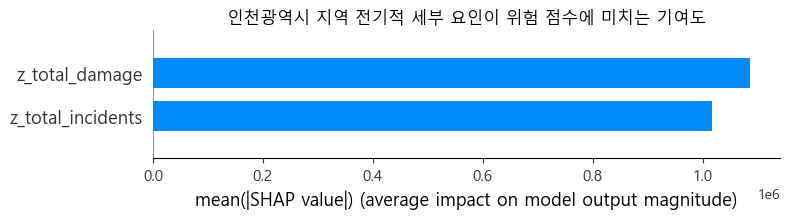

📌 전라남도 지역 SHAP 분석 진행 중...


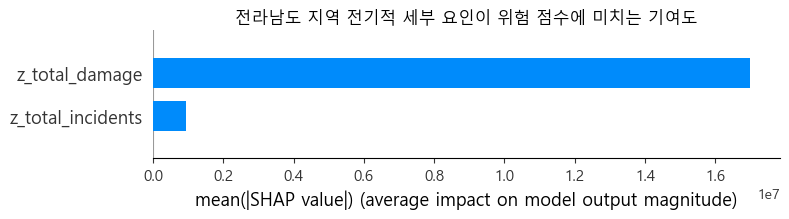

📌 전라북도 지역 SHAP 분석 진행 중...


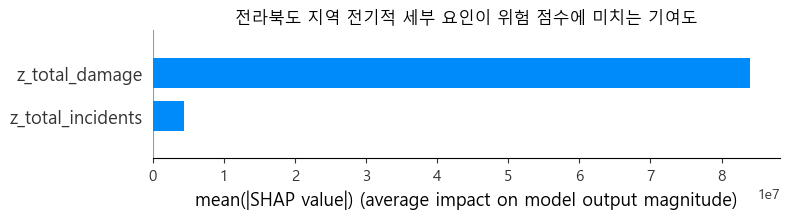

📌 제주특별자치도 지역 SHAP 분석 진행 중...


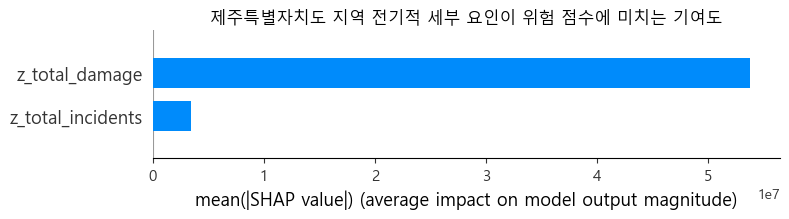

📌 충청남도 지역 SHAP 분석 진행 중...


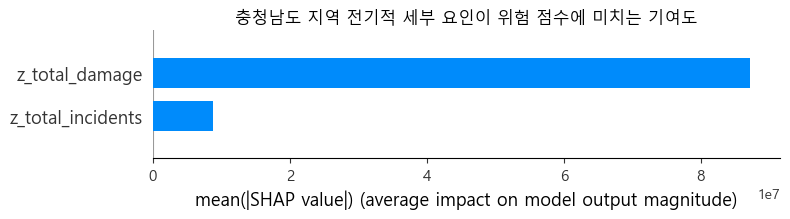

📌 충청북도 지역 SHAP 분석 진행 중...


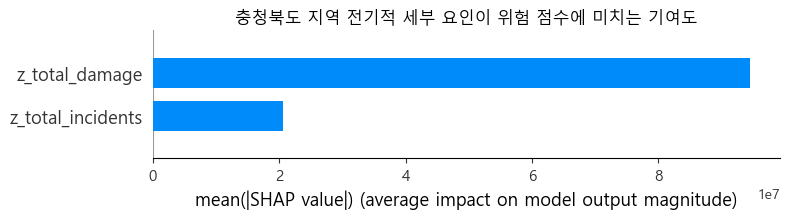

✅ 지역별 SHAP 분석 완료!


In [9]:
# 📌 라이브러리 불러오기
import pandas as pd  # 데이터 처리 라이브러리
import numpy as np  # 수학 연산 라이브러리
import shap  # SHAP 분석 라이브러리
import matplotlib.pyplot as plt  # 시각화 라이브러리
from sklearn.ensemble import RandomForestRegressor  # 랜덤포레스트 회귀 모델
from sklearn.preprocessing import StandardScaler  # Z-score 정규화
from matplotlib import rc  # 한글 폰트 설정

# 📌 한글 깨짐 방지 설정 (Windows 환경)
rc('font', family='Malgun Gothic')  
plt.rcParams['axes.unicode_minus'] = False  # 마이너스(-) 기호 깨짐 방지

# 📌 데이터 로드 (파일 경로 수정 필요)
file_path = "D:/MySQL/Uploads/electric_ai_zscore_with_cause.csv"  
data = pd.read_csv(file_path)

# 📌 데이터 확인
print("데이터 샘플:")
print(data.head())

# 📌 데이터 전처리 (Z-score 정규화 적용된 데이터 사용)
data["z_total_incidents"] = pd.to_numeric(data["z_total_incidents"], errors="coerce")  
data["z_total_damage"] = pd.to_numeric(data["z_total_damage"], errors="coerce")  
data["risk_score"] = pd.to_numeric(data["risk_score"], errors="coerce")  
data = data.dropna(subset=["z_total_incidents", "z_total_damage", "risk_score"])  

# 📌 지역별 SHAP 분석 수행
regions = data["region_province"].unique()  # 지역 목록 추출
shap_results = {}  # 지역별 SHAP 분석 결과 저장

for region in regions:
    print(f"📌 {region} 지역 SHAP 분석 진행 중...")

    # 해당 지역 데이터만 필터링
    region_data = data[data["region_province"] == region]

    # 독립 변수(X)와 종속 변수(y) 설정
    X = region_data[["z_total_incidents", "z_total_damage"]]
    y = region_data["risk_score"]

    # 랜덤포레스트 모델 학습 (지역별로 개별 학습)
    model = RandomForestRegressor(random_state=42, n_estimators=100)
    model.fit(X, y)

    # SHAP 분석 수행
    explainer = shap.TreeExplainer(model, feature_perturbation="interventional")
    shap_values = explainer(X)

    # 결과 저장
    shap_results[region] = shap_values

    # 📌 시각화: 지역별 SHAP 분석 결과
    plt.figure(figsize=(8, 5))
    shap.summary_plot(shap_values, X, plot_type="bar", show=False)
    plt.title(f"{region} 지역 전기적 세부 요인이 위험 점수에 미치는 기여도")
    plt.tight_layout()
    plt.show()

print("✅ 지역별 SHAP 분석 완료!")


데이터 샘플:
  region_province cause_subcategory  total_incidents  total_damage  \
0             강원도       절연열화에 의한 단락                6           491   
1             강원도           과부하/과전류                5       6173874   
2             강원도             미확인단락                3     102369533   
3             강원도         기타(전기적요인)                2      33864857   
4             강원도             누전,지락                1          4655   

    risk_score  z_total_incidents  z_total_damage  
0        491.0           0.298059       -0.404768  
1    6173874.0           0.092127       -0.373863  
2  102369533.0          -0.319736        0.107697  
3   33864857.0          -0.525667       -0.235241  
4       4655.0          -0.731599       -0.404747  
📌 강원도 지역 SHAP 분석 진행 중...


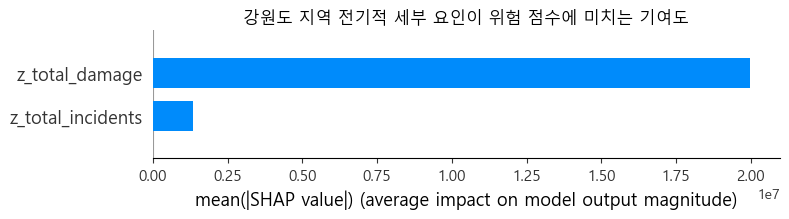

📌 경기도 지역 SHAP 분석 진행 중...


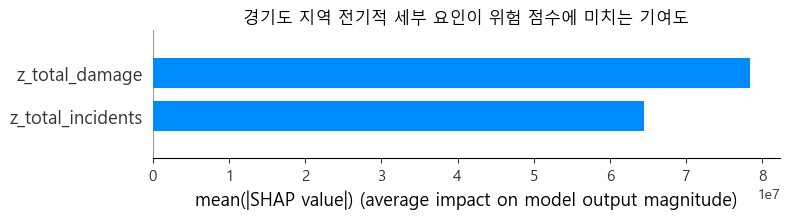

📌 경상남도 지역 SHAP 분석 진행 중...


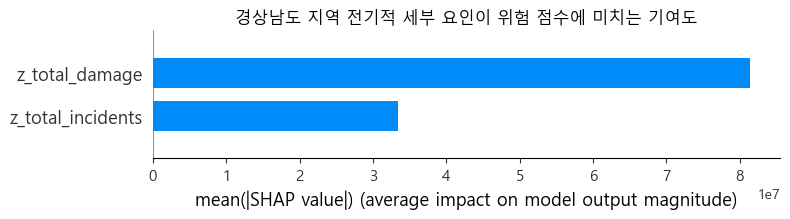

📌 경상북도 지역 SHAP 분석 진행 중...


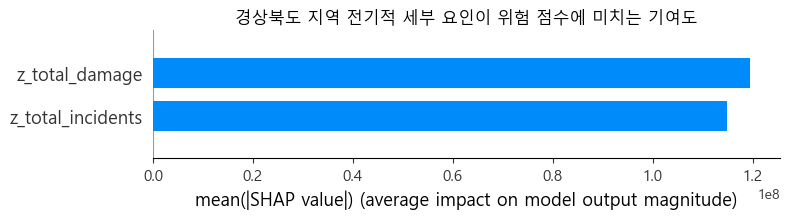

📌 광주광역시 지역 SHAP 분석 진행 중...


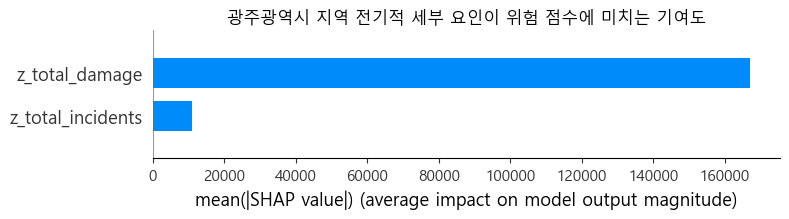

📌 대구광역시 지역 SHAP 분석 진행 중...


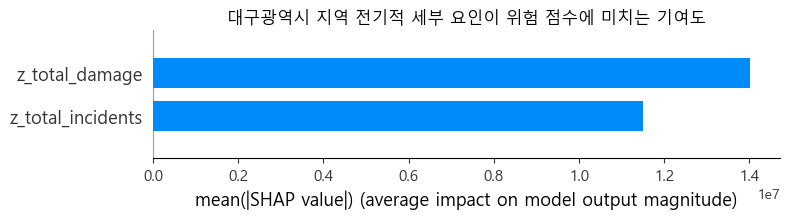

📌 대전광역시 지역 SHAP 분석 진행 중...


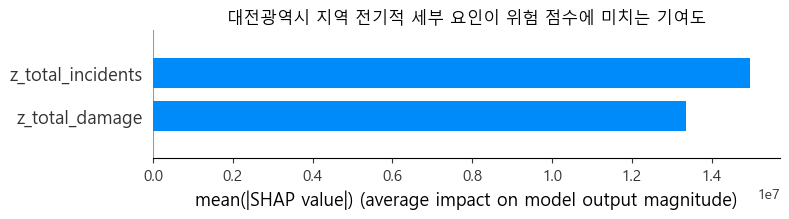

📌 부산광역시 지역 SHAP 분석 진행 중...


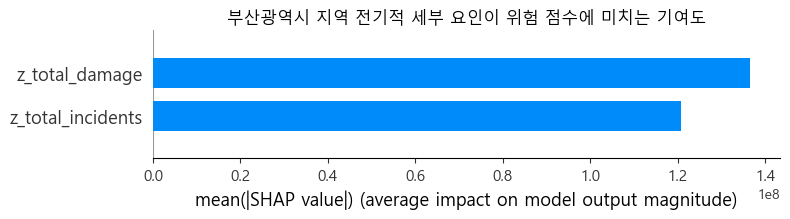

📌 서울특별시 지역 SHAP 분석 진행 중...


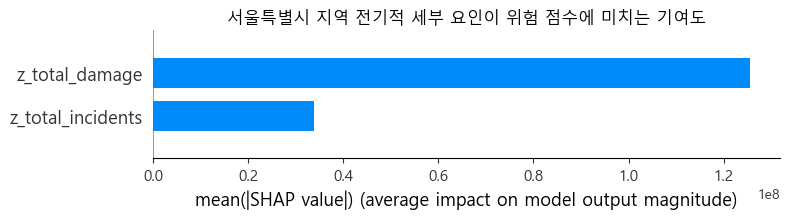

📌 세종특별자치시 지역 SHAP 분석 진행 중...


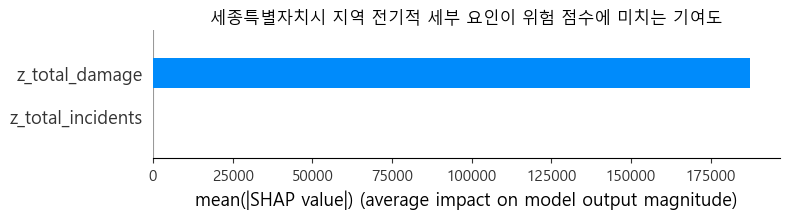

📌 울산광역시 지역 SHAP 분석 진행 중...


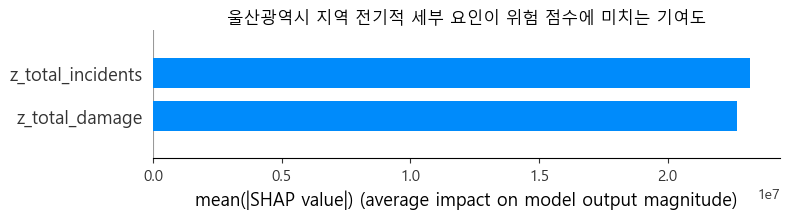

📌 인천광역시 지역 SHAP 분석 진행 중...


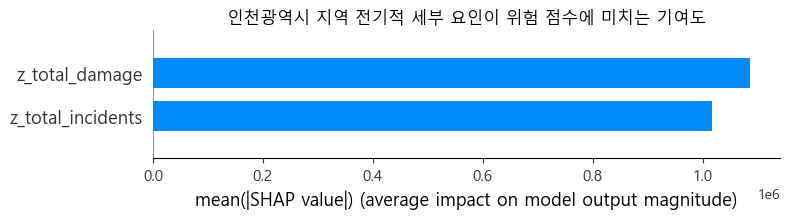

📌 전라남도 지역 SHAP 분석 진행 중...


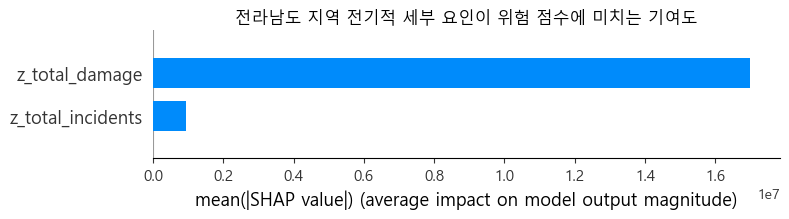

📌 전라북도 지역 SHAP 분석 진행 중...


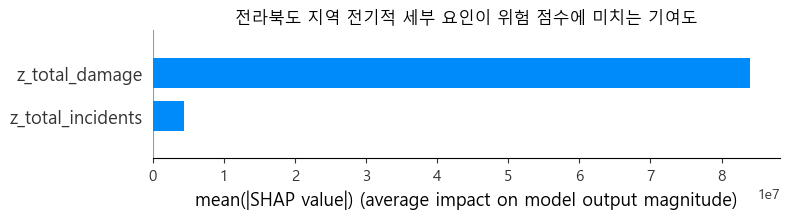

📌 제주특별자치도 지역 SHAP 분석 진행 중...


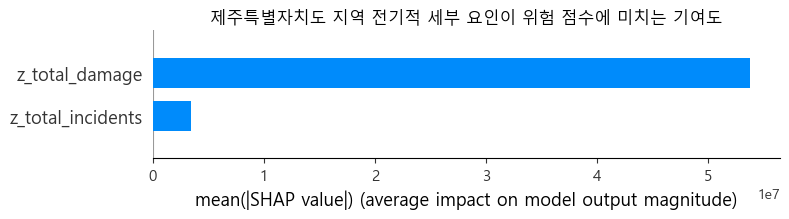

📌 충청남도 지역 SHAP 분석 진행 중...


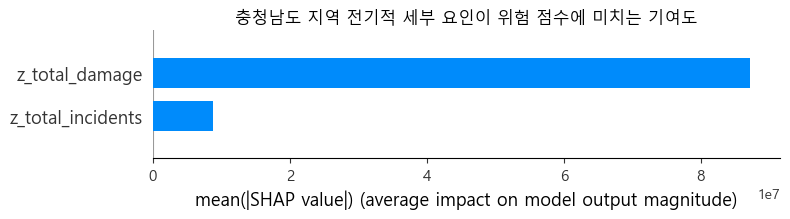

📌 충청북도 지역 SHAP 분석 진행 중...


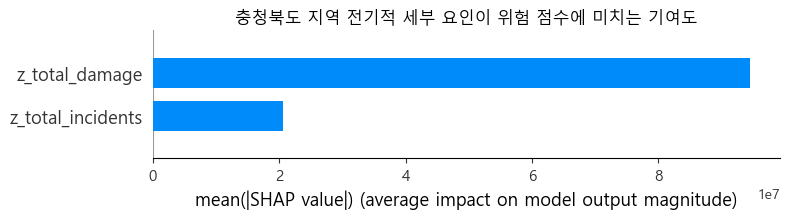

📌 지역별 전기적 세부 요인 위험 점수 감소 기여도:
    Region        Cause  Reduction (%)
0      강원도  절연열화에 의한 단락   -1981.590075
1      강원도      과부하/과전류    -970.076879
2      강원도        미확인단락      -0.084085
3      강원도    기타(전기적요인)    -220.955086
4      강원도        누전,지락 -112843.868937
..     ...          ...            ...
109   충청북도  절연열화에 의한 단락    -626.037324
110   충청북도      과부하/과전류      57.377715
111   충청북도        미확인단락      66.131847
112   충청북도    기타(전기적요인)    -626.029430
113   충청북도  접촉불량에 의한 단락     -37.133225

[114 rows x 3 columns]


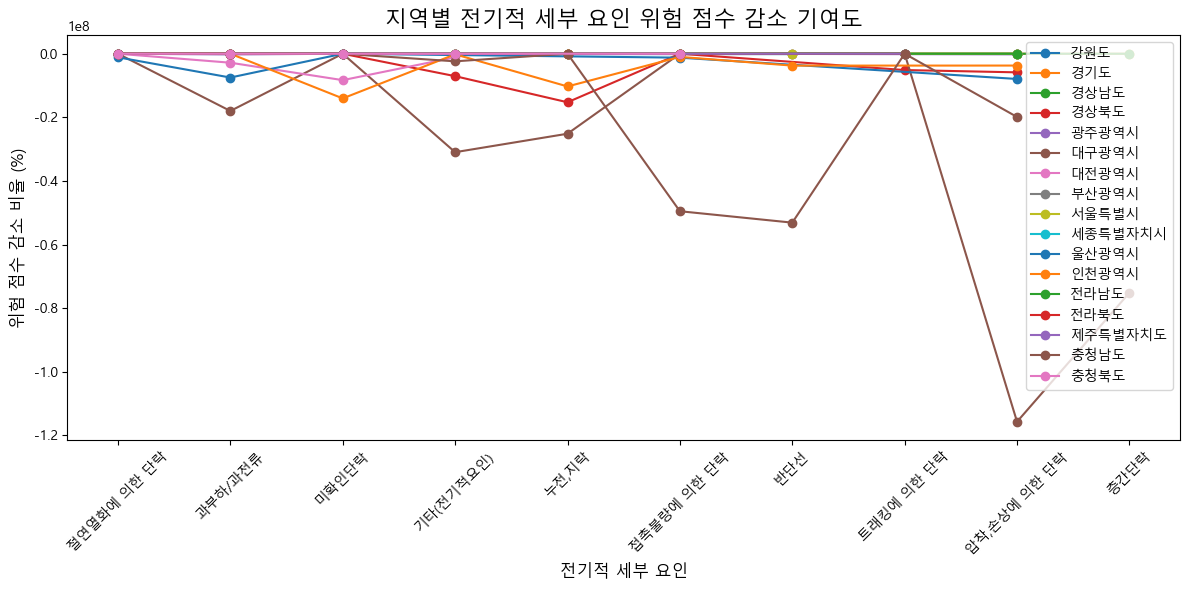

In [10]:
# 📌 라이브러리 불러오기
import pandas as pd  # 데이터 처리 라이브러리
import numpy as np  # 수학 연산 라이브러리
import shap  # SHAP 분석 라이브러리
import matplotlib.pyplot as plt  # 시각화 라이브러리
from sklearn.ensemble import RandomForestRegressor  # 랜덤포레스트 회귀 모델
from sklearn.preprocessing import StandardScaler  # Z-score 정규화
from matplotlib import rc  # 한글 폰트 설정

# 📌 한글 깨짐 방지 설정 (Windows 환경)
rc('font', family='Malgun Gothic')  
plt.rcParams['axes.unicode_minus'] = False  # 마이너스(-) 기호 깨짐 방지

# 📌 데이터 로드 (파일 경로 수정 필요)
file_path = "D:/MySQL/Uploads/electric_ai_zscore_with_cause.csv"  
data = pd.read_csv(file_path)

# 📌 데이터 확인
print("데이터 샘플:")
print(data.head())

# 📌 데이터 전처리 (Z-score 정규화 적용된 데이터 사용)
data["z_total_incidents"] = pd.to_numeric(data["z_total_incidents"], errors="coerce")  
data["z_total_damage"] = pd.to_numeric(data["z_total_damage"], errors="coerce")  
data["risk_score"] = pd.to_numeric(data["risk_score"], errors="coerce")  
data = data.dropna(subset=["z_total_incidents", "z_total_damage", "risk_score"])  

# 📌 지역별 전기적 세부 요인별 SHAP 분석 수행
regions = data["region_province"].unique()  # 지역 목록 추출
causes = data["cause_subcategory"].unique()  # 전기적 세부 요인 목록 추출
shap_results = {}  # 지역별 SHAP 분석 결과 저장
reduction_results = []  # 위험 감소 기여도 저장

for region in regions:
    print(f"📌 {region} 지역 SHAP 분석 진행 중...")

    # 해당 지역 데이터만 필터링
    region_data = data[data["region_province"] == region]

    # 독립 변수(X)와 종속 변수(y) 설정
    X = region_data[["z_total_incidents", "z_total_damage"]]
    y = region_data["risk_score"]

    # 랜덤포레스트 모델 학습 (지역별로 개별 학습)
    model = RandomForestRegressor(random_state=42, n_estimators=100)
    model.fit(X, y)

    # SHAP 분석 수행
    explainer = shap.TreeExplainer(model, feature_perturbation="interventional")
    shap_values = explainer(X)

    # 결과 저장
    shap_results[region] = shap_values

    # 📌 시각화: 지역별 SHAP 분석 결과
    plt.figure(figsize=(8, 5))
    shap.summary_plot(shap_values, X, plot_type="bar", show=False)
    plt.title(f"{region} 지역 전기적 세부 요인이 위험 점수에 미치는 기여도")
    plt.tight_layout()
    plt.show()

    # 📌 전기적 세부 요인별 위험 점수 감소 기여도 분석
    for cause in causes:
        target_data = region_data[region_data["cause_subcategory"] == cause]

        if target_data.empty:
            continue  # 데이터가 없는 경우 건너뛰기

        # 개선 가정: 해당 요인을 100% 제거 (발생 건수와 피해 금액을 0으로 설정)
        improved_data = target_data.copy()
        improved_data["z_total_incidents"] = 0
        improved_data["z_total_damage"] = 0

        # 원본과 개선 데이터의 위험 점수 평균 계산
        original_risk_score = model.predict(target_data[["z_total_incidents", "z_total_damage"]]).mean()
        improved_risk_score = model.predict(improved_data[["z_total_incidents", "z_total_damage"]]).mean()

        # 위험 점수 감소 비율 계산
        reduction_percentage = ((original_risk_score - improved_risk_score) / original_risk_score) * 100
        reduction_results.append({"Region": region, "Cause": cause, "Reduction (%)": reduction_percentage})

# 📌 결과를 데이터프레임으로 정리
reduction_df = pd.DataFrame(reduction_results)
print("📌 지역별 전기적 세부 요인 위험 점수 감소 기여도:")
print(reduction_df)

# 📌 시각화: 지역별 전기적 세부 요인 위험 점수 감소 기여도 비교
plt.figure(figsize=(12, 6))
for region in regions:
    region_df = reduction_df[reduction_df["Region"] == region]
    plt.plot(region_df["Cause"], region_df["Reduction (%)"], marker="o", label=region)

plt.xlabel("전기적 세부 요인", fontsize=12)
plt.ylabel("위험 점수 감소 비율 (%)", fontsize=12)
plt.title("지역별 전기적 세부 요인 위험 점수 감소 기여도", fontsize=16)
plt.xticks(rotation=45)  # X축 글자 회전
plt.legend(loc="upper right")  # 범례 설정
plt.tight_layout()
plt.show()


📌 지역별 전기적 세부 요인 위험 점수 감소 기여도:
    Region        Cause  Reduction (%)
0      강원도  절연열화에 의한 단락   -1981.590075
1      강원도      과부하/과전류    -970.076879
2      강원도        미확인단락      -0.084085
3      강원도    기타(전기적요인)    -220.955086
4      강원도        누전,지락 -112843.868937
..     ...          ...            ...
109   충청북도  절연열화에 의한 단락    -626.037324
110   충청북도      과부하/과전류      57.377715
111   충청북도        미확인단락      66.131847
112   충청북도    기타(전기적요인)    -626.029430
113   충청북도  접촉불량에 의한 단락     -37.133225

[114 rows x 3 columns]


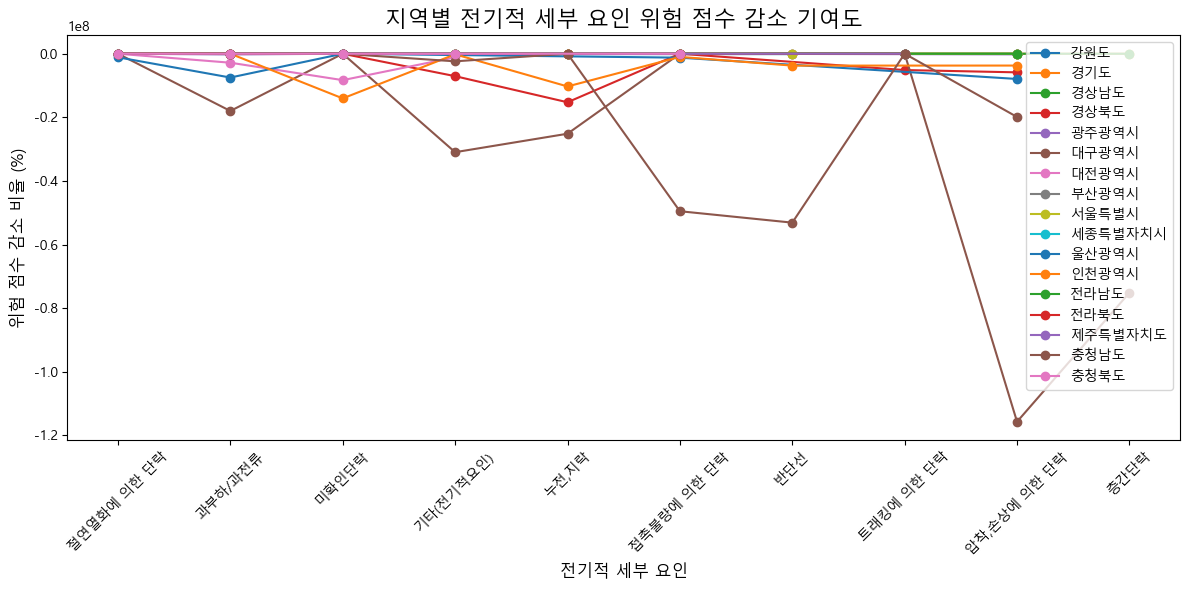

In [11]:
# 📌 결과를 데이터프레임으로 정리
reduction_df = pd.DataFrame(reduction_results)
print("📌 지역별 전기적 세부 요인 위험 점수 감소 기여도:")
print(reduction_df)

# 📌 시각화: 지역별 전기적 세부 요인 위험 점수 감소 기여도 비교
plt.figure(figsize=(12, 6))
for region in regions:
    region_df = reduction_df[reduction_df["Region"] == region]
    plt.plot(region_df["Cause"], region_df["Reduction (%)"], marker="o", label=region)

plt.xlabel("전기적 세부 요인", fontsize=12)
plt.ylabel("위험 점수 감소 비율 (%)", fontsize=12)
plt.title("지역별 전기적 세부 요인 위험 점수 감소 기여도", fontsize=16)
plt.xticks(rotation=45)  # X축 글자 회전
plt.legend(loc="upper right")  # 범례 설정
plt.tight_layout()
plt.show()

데이터 샘플 확인:
  region_province cause_subcategory  total_incidents  total_damage  \
0             강원도       절연열화에 의한 단락                6           491   
1             강원도           과부하/과전류                5       6173874   
2             강원도             미확인단락                3     102369533   
3             강원도         기타(전기적요인)                2      33864857   
4             강원도             누전,지락                1          4655   

    risk_score  z_total_incidents  z_total_damage  
0        491.0           0.298059       -0.404768  
1    6173874.0           0.092127       -0.373863  
2  102369533.0          -0.319736        0.107697  
3   33864857.0          -0.525667       -0.235241  
4       4655.0          -0.731599       -0.404747  


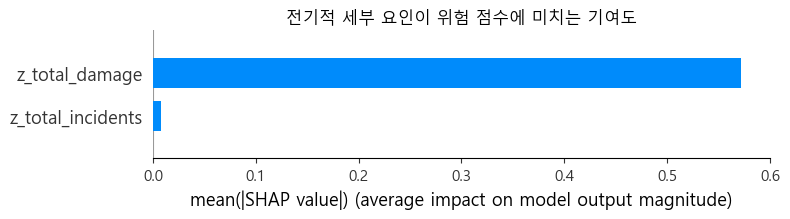

In [12]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import shap
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import StandardScaler  # Z-score 정규화

# 한글 깨짐 방지 설정
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
file_path = "D:/MySQL/Uploads/electric_ai_zscore_with_cause.csv"
data = pd.read_csv(file_path)

# 데이터 확인
print("데이터 샘플 확인:")
print(data.head())

# 데이터 전처리 (정규화 수행)
scaler = StandardScaler()

# 위험 점수 정규화 추가
data["z_total_incidents"] = pd.to_numeric(data["z_total_incidents"], errors="coerce")  # 정규화된 발생 건수
data["z_total_damage"] = pd.to_numeric(data["z_total_damage"], errors="coerce")  # 정규화된 피해 금액
data["risk_score"] = pd.to_numeric(data["risk_score"], errors="coerce")  # 원본 위험 점수

# 결측값 제거
data = data.dropna(subset=["z_total_incidents", "z_total_damage", "risk_score"])

# 위험 점수도 정규화
data["z_risk_score"] = scaler.fit_transform(data[["risk_score"]])  # 위험 점수 정규화

# 독립변수(X)와 종속변수(y) 설정
X = data[["z_total_incidents", "z_total_damage"]]
y = data["z_risk_score"]  # 정규화된 위험 점수 사용

# 랜덤포레스트 모델 학습
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X, y)

# SHAP 분석 수행
explainer = shap.TreeExplainer(model, feature_perturbation="interventional")
shap_values = explainer(X)

# SHAP 요약 플롯 생성 (요인별 중요도)
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title("전기적 세부 요인이 위험 점수에 미치는 기여도")
plt.tight_layout()
plt.show()

# 🚀 위험 점수도 정규화하여 계산한 결과를 활용


데이터 샘플 확인:
  region_province cause_subcategory  total_incidents  total_damage  \
0             강원도       절연열화에 의한 단락                6           491   
1             강원도           과부하/과전류                5       6173874   
2             강원도             미확인단락                3     102369533   
3             강원도         기타(전기적요인)                2      33864857   
4             강원도             누전,지락                1          4655   

    risk_score  z_total_incidents  z_total_damage  
0        491.0           0.298059       -0.404768  
1    6173874.0           0.092127       -0.373863  
2  102369533.0          -0.319736        0.107697  
3   33864857.0          -0.525667       -0.235241  
4       4655.0          -0.731599       -0.404747  


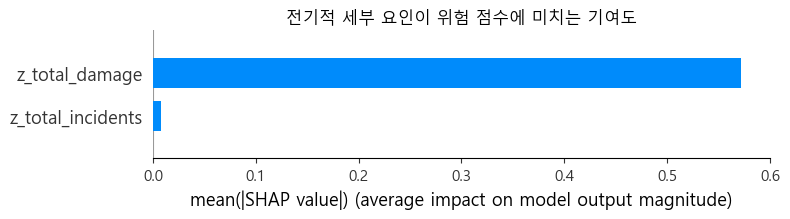

In [13]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import shap
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import StandardScaler  # Z-score 정규화

# 한글 깨짐 방지 설정
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
file_path = "D:/MySQL/Uploads/electric_ai_zscore_with_cause.csv"
data = pd.read_csv(file_path)

# 데이터 확인
print("데이터 샘플 확인:")
print(data.head())

# 데이터 전처리 (정규화 수행)
scaler = StandardScaler()

# 위험 점수 정규화 추가
data["z_total_incidents"] = pd.to_numeric(data["z_total_incidents"], errors="coerce")  # 정규화된 발생 건수
data["z_total_damage"] = pd.to_numeric(data["z_total_damage"], errors="coerce")  # 정규화된 피해 금액
data["risk_score"] = pd.to_numeric(data["risk_score"], errors="coerce")  # 원본 위험 점수

# 결측값 제거
data = data.dropna(subset=["z_total_incidents", "z_total_damage", "risk_score"])

# 위험 점수도 정규화
data["z_risk_score"] = scaler.fit_transform(data[["risk_score"]])  # 위험 점수 정규화

# 독립변수(X)와 종속변수(y) 설정
X = data[["z_total_incidents", "z_total_damage"]]
y = data["z_risk_score"]  # 정규화된 위험 점수 사용

# 랜덤포레스트 모델 학습
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X, y)

# SHAP 분석 수행
explainer = shap.TreeExplainer(model, feature_perturbation="interventional")
shap_values = explainer(X)

# SHAP 요약 플롯 생성 (요인별 중요도)
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title("전기적 세부 요인이 위험 점수에 미치는 기여도")
plt.tight_layout()
plt.show()

# 🚀 위험 점수도 정규화하여 계산한 결과를 활용


📌 원본 데이터 샘플 확인:
  region_province cause_subcategory  total_incidents  total_damage  \
0             강원도       절연열화에 의한 단락                6           491   
1             강원도           과부하/과전류                5       6173874   
2             강원도             미확인단락                3     102369533   
3             강원도         기타(전기적요인)                2      33864857   
4             강원도             누전,지락                1          4655   

    risk_score  z_total_incidents  z_total_damage  
0        491.0           0.298059       -0.404768  
1    6173874.0           0.092127       -0.373863  
2  102369533.0          -0.319736        0.107697  
3   33864857.0          -0.525667       -0.235241  
4       4655.0          -0.731599       -0.404747  

📌 정규화된 데이터 샘플 확인:
   z_total_incidents  z_total_damage  z_risk_score
0           0.298059       -0.404768     -0.404768
1           0.092127       -0.373863     -0.373863
2          -0.319736        0.107697      0.107697
3          -0.525667       -

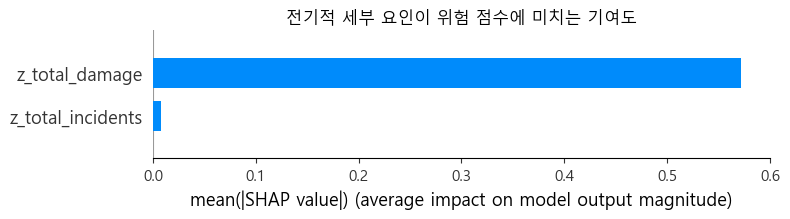

In [14]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import shap
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import StandardScaler  # Z-score 정규화

# 한글 깨짐 방지 설정
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
file_path = "D:/MySQL/Uploads/electric_ai_zscore_with_cause.csv"
data = pd.read_csv(file_path)

# 데이터 확인
print("📌 원본 데이터 샘플 확인:")
print(data.head())

# 데이터 전처리 (정규화 수행)
scaler = StandardScaler()  # 정규화 객체 생성

# 데이터 타입 변환 (숫자로 변경)
data["z_total_incidents"] = pd.to_numeric(data["z_total_incidents"], errors="coerce")  # 정규화된 발생 건수
data["z_total_damage"] = pd.to_numeric(data["z_total_damage"], errors="coerce")  # 정규화된 피해 금액
data["risk_score"] = pd.to_numeric(data["risk_score"], errors="coerce")  # 위험 점수 (원본)

# 결측값 제거
data = data.dropna(subset=["z_total_incidents", "z_total_damage", "risk_score"])

# 위험 점수도 Z-score 정규화 수행
data["z_risk_score"] = scaler.fit_transform(data[["risk_score"]])  # 🚀 위험 점수도 정규화

# 🚀 정규화된 데이터 확인
print("\n📌 정규화된 데이터 샘플 확인:")
print(data[["z_total_incidents", "z_total_damage", "z_risk_score"]].head())

# 독립변수(X)와 종속변수(y) 설정
X = data[["z_total_incidents", "z_total_damage"]]  # 정규화된 발생 건수 & 피해 금액
y = data["z_risk_score"]  # 🚀 정규화된 위험 점수 사용

# 랜덤포레스트 모델 학습
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X, y)

# SHAP 분석 수행
explainer = shap.TreeExplainer(model, feature_perturbation="interventional")
shap_values = explainer(X)

# SHAP 요약 플롯 생성 (요인별 중요도)
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title("전기적 세부 요인이 위험 점수에 미치는 기여도")
plt.tight_layout()
plt.show()


In [16]:
대전광역시 지역의 데이터 샘플이 부족하여 분석에서 제외됨.
⚠ 세종특별자치시 지역의 데이터 샘플이 부족하여 분석에서 제외됨.

SyntaxError: invalid character '⚠' (U+26A0) (3781033468.py, line 2)

In [18]:
print(data["region_province"].value_counts())

region_province
경기도        10
서울특별시       9
경상남도        9
충청남도        9
대구광역시       9
경상북도        8
인천광역시       8
전라남도        7
강원도         7
부산광역시       6
전라북도        6
울산광역시       5
제주특별자치도     5
광주광역시       5
충청북도        5
대전광역시       4
세종특별자치시     2
Name: count, dtype: int64


In [17]:
대전광역시 지역의 데이터 샘플이 부족하여 분석에서 제외됨.
⚠ 세종특별자치시 지역의 데이터 샘플이 부족하여 분석에서 제외됨.

SyntaxError: invalid character '⚠' (U+26A0) (3781033468.py, line 2)

In [19]:
print(shap_df[shap_df["Region"] == "광주광역시"])

  Region  Incident SHAP  Damage SHAP
4  광주광역시       0.000053     0.000825


In [20]:
print(data.groupby("region_province").size())

region_province
강원도         7
경기도        10
경상남도        9
경상북도        8
광주광역시       5
대구광역시       9
대전광역시       4
부산광역시       6
서울특별시       9
세종특별자치시     2
울산광역시       5
인천광역시       8
전라남도        7
전라북도        6
제주특별자치도     5
충청남도        9
충청북도        5
dtype: int64



데이터 컬럼 목록: Index(['region_province', 'cause_subcategory', 'total_incidents',
       'total_damage', 'risk_score', 'z_total_incidents', 'z_total_damage'],
      dtype='object')


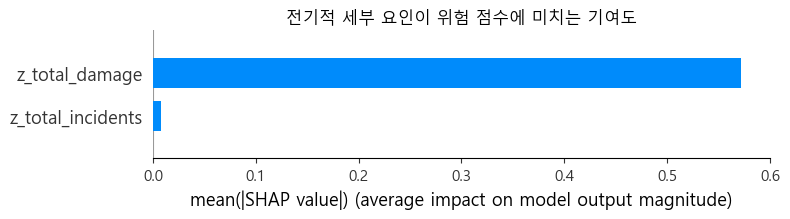


지역별 전기적 세부 요인 위험 점수 감소 기여도:
    Region        Cause  Reduction (%)
0      강원도  절연열화에 의한 단락     102.366521
1      강원도      과부하/과전류     102.561127
2      강원도        미확인단락      90.742753
3      강원도    기타(전기적요인)     104.115038
4      강원도        누전,지락     102.366651
..     ...          ...            ...
109   충청북도  절연열화에 의한 단락     102.366508
110   충청북도      과부하/과전류      98.754679
111   충청북도        미확인단락      99.126071
112   충청북도    기타(전기적요인)     102.366518
113   충청북도  접촉불량에 의한 단락      81.082598

[114 rows x 3 columns]


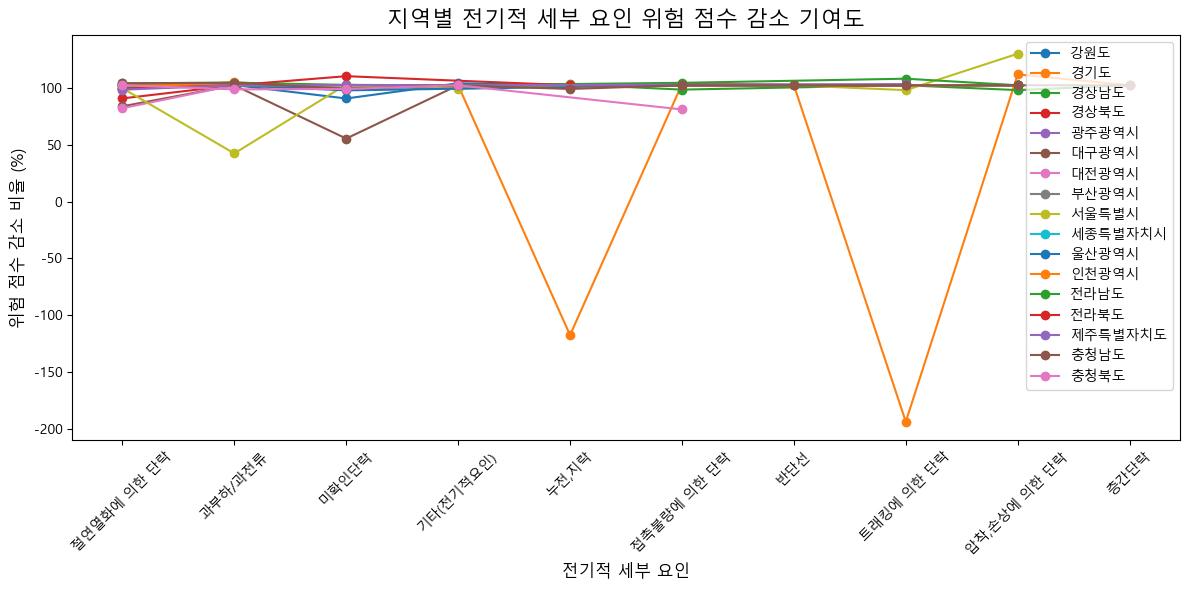

In [25]:
# 필수 라이브러리 로드
import pandas as pd  # 데이터 처리 라이브러리
import numpy as np  # 수학 연산 라이브러리
from sklearn.ensemble import RandomForestRegressor  # 랜덤포레스트 모델
import shap  # SHAP 라이브러리
import matplotlib.pyplot as plt  # 시각화 라이브러리
from matplotlib import rc  # 한글 폰트 설정
from sklearn.preprocessing import StandardScaler  # Z-score 정규화를 위한 라이브러리

# 한글 폰트 설정 (Windows: 'Malgun Gothic', Linux: 'NanumGothic')
rc('font', family='Malgun Gothic')  # Windows 환경
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 로드
file_path = "D:/MySQL/Uploads/electric_ai_zscore_with_cause.csv"
data = pd.read_csv(file_path)

# 데이터 컬럼 확인
print("\n데이터 컬럼 목록:", data.columns)

# 📌 위험 점수 정규화 (z_risk_score 추가)
if "z_risk_score" not in data.columns:  # z_risk_score이 없으면 생성
    if "risk_score" in data.columns:
        scaler = StandardScaler()
        data["z_risk_score"] = scaler.fit_transform(data[["risk_score"]])  
    else:
        raise KeyError("CSV 파일에 'risk_score' 컬럼이 없습니다.")

# 정규화된 데이터 변환
data["z_total_incidents"] = pd.to_numeric(data["z_total_incidents"], errors="coerce")  
data["z_total_damage"] = pd.to_numeric(data["z_total_damage"], errors="coerce")  
data = data.dropna(subset=["z_total_incidents", "z_total_damage", "z_risk_score"])  

# 독립변수(X)와 종속변수(y) 설정 (정규화된 데이터 사용)
X = data[["z_total_incidents", "z_total_damage"]]  
y = data["z_risk_score"]  

# 랜덤포레스트 모델 학습
model = RandomForestRegressor(random_state=42, n_estimators=100)  
model.fit(X, y)  

# SHAP 분석: 전체 데이터에 대한 중요도 평가
explainer = shap.TreeExplainer(model, feature_perturbation="interventional")  
shap_values = explainer(X)  

# SHAP 요약 플롯 생성 (전체 데이터 기준)
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title("전기적 세부 요인이 위험 점수에 미치는 기여도")  
plt.tight_layout()  
plt.show()  

# 지역별 & 요인별 위험 점수 감소 기여도 분석
regions = data["region_province"].unique()  
causes = data["cause_subcategory"].unique()  
shap_results = []  

# 분석 기준: 샘플 개수가 2개 미만이면 제외
for region in regions:
    region_data = data[data["region_province"] == region]  
    if len(region_data) < 2:  
        print(f"{region} 지역의 데이터 샘플이 부족하여 분석에서 제외됨.")
        continue
    
    for cause in causes:
        cause_data = region_data[region_data["cause_subcategory"] == cause]  
        if cause_data.empty:
            continue  
        
        # 개선 가정: 특정 요인을 완전히 제거했을 때 위험 점수 변화
        improved_data = cause_data.copy()
        improved_data["z_total_incidents"] = 0  
        improved_data["z_total_damage"] = 0  

        # 원본 데이터 vs 개선 데이터 비교 (위험 점수 예측)
        original_risk_score = model.predict(cause_data[["z_total_incidents", "z_total_damage"]]).mean()
        improved_risk_score = model.predict(improved_data[["z_total_incidents", "z_total_damage"]]).mean()

        # 위험 점수 감소 비율 계산
        reduction_percentage = ((original_risk_score - improved_risk_score) / original_risk_score) * 100
        shap_results.append({"Region": region, "Cause": cause, "Reduction (%)": reduction_percentage})

# 결과 데이터프레임 생성
shap_df = pd.DataFrame(shap_results)

# SHAP 값이 0에 가까운 경우 제외 (해석력 향상)
shap_threshold = 0.0001
shap_df = shap_df[(shap_df["Reduction (%)"].abs() > shap_threshold)]

# 결과 출력
print("\n지역별 전기적 세부 요인 위험 점수 감소 기여도:")
print(shap_df)

# 시각화: 지역별 전기적 세부 요인별 위험 점수 감소 기여도 비교
plt.figure(figsize=(12, 6))

# 지역별 그래프 생성
for region in shap_df["Region"].unique():
    region_df = shap_df[shap_df["Region"] == region]
    plt.plot(region_df["Cause"], region_df["Reduction (%)"], marker="o", label=region)

# 그래프 설정
plt.xlabel("전기적 세부 요인", fontsize=12)
plt.ylabel("위험 점수 감소 비율 (%)", fontsize=12)
plt.title("지역별 전기적 세부 요인 위험 점수 감소 기여도", fontsize=16)
plt.xticks(rotation=45)  
plt.legend(loc="upper right")  
plt.tight_layout()  
plt.show()  



원본 데이터 샘플 확인:
  region_province cause_subcategory  total_incidents  total_damage  \
0             강원도       절연열화에 의한 단락                6           491   
1             강원도           과부하/과전류                5       6173874   
2             강원도             미확인단락                3     102369533   
3             강원도         기타(전기적요인)                2      33864857   
4             강원도             누전,지락                1          4655   

    risk_score  z_total_incidents  z_total_damage  
0        491.0           0.298059       -0.404768  
1    6173874.0           0.092127       -0.373863  
2  102369533.0          -0.319736        0.107697  
3   33864857.0          -0.525667       -0.235241  
4       4655.0          -0.731599       -0.404747  

정규화된 데이터 샘플 확인:
   z_total_incidents  z_total_damage  z_risk_score
0           0.298059       -0.404768     -0.404768
1           0.092127       -0.373863     -0.373863
2          -0.319736        0.107697      0.107697
3          -0.525667       -0.2

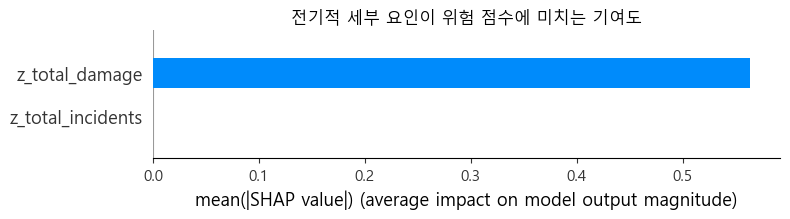


지역별 전기적 세부 요인 위험 점수 감소 기여도:
    Region        Cause  Reduction (%)
0      강원도  절연열화에 의한 단락     100.223481
1      강원도      과부하/과전류     100.245406
2      강원도        미확인단락      98.945625
3      강원도    기타(전기적요인)     100.385749
4      강원도        누전,지락     100.223482
..     ...          ...            ...
109   충청북도  절연열화에 의한 단락     100.223481
110   충청북도      과부하/과전류      99.906214
111   충청북도        미확인단락      99.930910
112   충청북도    기타(전기적요인)     100.223481
113   충청북도  접촉불량에 의한 단락      95.961062

[113 rows x 3 columns]


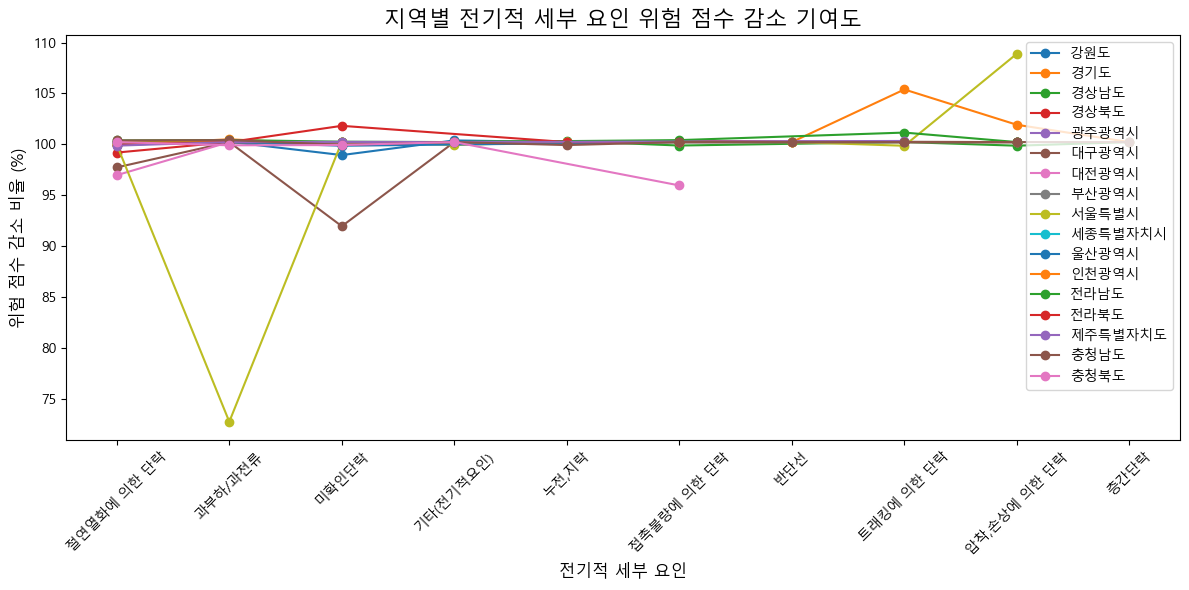

In [27]:
# 필수 라이브러리 로드
import pandas as pd  # 데이터 처리
import numpy as np  # 수학 연산
from sklearn.ensemble import RandomForestRegressor  # 랜덤포레스트 모델
import shap  # SHAP 분석
import matplotlib.pyplot as plt  # 시각화 라이브러리
from matplotlib import rc  # 한글 폰트 설정
from sklearn.preprocessing import StandardScaler  # Z-score 정규화

# 한글 폰트 설정 (Windows: 'Malgun Gothic', Linux: 'NanumGothic')
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 로드
file_path = "D:/MySQL/Uploads/electric_ai_zscore_with_cause.csv"
data = pd.read_csv(file_path)

# 데이터 샘플 확인
print("\n원본 데이터 샘플 확인:")
print(data.head())

# Z-score 정규화 수행 (z_risk_score 추가 정규화)
scaler = StandardScaler()
data["z_total_incidents"] = scaler.fit_transform(data[["total_incidents"]])  # 정규화된 발생 건수
data["z_total_damage"] = scaler.fit_transform(data[["total_damage"]])  # 정규화된 피해 금액
data["z_risk_score"] = scaler.fit_transform(data[["risk_score"]])  # 정규화된 위험 점수 추가

# 정규화된 데이터 확인
print("\n정규화된 데이터 샘플 확인:")
print(data[["z_total_incidents", "z_total_damage", "z_risk_score"]].head())

# 독립변수(X)와 종속변수(y) 설정 (정규화된 데이터 사용)
X = data[["z_total_incidents", "z_total_damage"]]  
y = data["z_risk_score"]  

# ✅ 과적합 방지를 위한 모델 최적화
model = RandomForestRegressor(
    n_estimators=50,  # 트리 개수 감소 (기존 100 → 50)
    max_depth=5,  # 트리의 최대 깊이 제한
    min_samples_leaf=5,  # 리프 노드당 최소 샘플 개수 설정 (불필요한 작은 분할 방지)
    random_state=42
)
model.fit(X, y)  

# SHAP 분석: 전체 데이터에 대한 중요도 평가
explainer = shap.TreeExplainer(model, feature_perturbation="interventional")  
shap_values = explainer(X)  

# SHAP 요약 플롯 생성 (전체 데이터 기준)
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title("전기적 세부 요인이 위험 점수에 미치는 기여도")  
plt.tight_layout()  
plt.show()  

# 지역별 & 요인별 위험 점수 감소 기여도 분석
regions = data["region_province"].unique()  
causes = data["cause_subcategory"].unique()  
shap_results = []  

# 분석 기준: 샘플 개수가 2개 미만이면 제외
for region in regions:
    region_data = data[data["region_province"] == region]  
    if len(region_data) < 2:  
        print(f"{region} 지역의 데이터 샘플이 부족하여 분석에서 제외됨.")
        continue
    
    for cause in causes:
        cause_data = region_data[region_data["cause_subcategory"] == cause]  
        if cause_data.empty:
            continue  
        
        # 개선 가정: 특정 요인을 완전히 제거했을 때 위험 점수 변화
        improved_data = cause_data.copy()
        improved_data["z_total_incidents"] = 0  
        improved_data["z_total_damage"] = 0  

        # 원본 데이터 vs 개선 데이터 비교 (위험 점수 예측)
        original_risk_score = model.predict(cause_data[["z_total_incidents", "z_total_damage"]]).mean()
        improved_risk_score = model.predict(improved_data[["z_total_incidents", "z_total_damage"]]).mean()

        # 위험 점수 감소 비율 계산
        reduction_percentage = ((original_risk_score - improved_risk_score) / original_risk_score) * 100
        shap_results.append({"Region": region, "Cause": cause, "Reduction (%)": reduction_percentage})

# 결과 데이터프레임 생성
shap_df = pd.DataFrame(shap_results)

# SHAP 값이 0에 가까운 경우 제외 (해석력 향상)
shap_threshold = 0.0001
shap_df = shap_df[(shap_df["Reduction (%)"].abs() > shap_threshold)]

# 결과 출력
print("\n지역별 전기적 세부 요인 위험 점수 감소 기여도:")
print(shap_df)

# 시각화: 지역별 전기적 세부 요인별 위험 점수 감소 기여도 비교
plt.figure(figsize=(12, 6))

# 지역별 그래프 생성
for region in shap_df["Region"].unique():
    region_df = shap_df[shap_df["Region"] == region]
    plt.plot(region_df["Cause"], region_df["Reduction (%)"], marker="o", label=region)

# 그래프 설정
plt.xlabel("전기적 세부 요인", fontsize=12)
plt.ylabel("위험 점수 감소 비율 (%)", fontsize=12)
plt.title("지역별 전기적 세부 요인 위험 점수 감소 기여도", fontsize=16)
plt.xticks(rotation=45)  
plt.legend(loc="upper right")  
plt.tight_layout()  
plt.show()  



🔍 정규화된 데이터 샘플 확인:
   z_total_incidents  z_total_damage  z_risk_score
0           0.298059       -0.404768     -0.289779
1           0.092127       -0.373863     -0.280324
2          -0.319736        0.107697     -0.195705
3          -0.525667       -0.235241     -0.269032
4          -0.731599       -0.404747     -0.289778


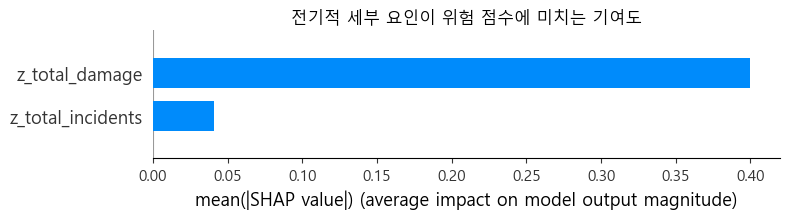


📉 지역별 전기적 세부 요인 위험 점수 감소 기여도:
    Region        Cause  Reduction (%)
0      강원도  절연열화에 의한 단락      61.481925
1      강원도      과부하/과전류      59.435869
2      강원도        미확인단락      24.183936
3      강원도    기타(전기적요인)      54.561902
4      강원도        누전,지락      61.481883
..     ...          ...            ...
109   충청북도  절연열화에 의한 단락      61.481925
110   충청북도      과부하/과전류     162.937669
111   충청북도        미확인단락     120.064076
112   충청북도    기타(전기적요인)      61.481925
113   충청북도  접촉불량에 의한 단락      24.730661

[114 rows x 3 columns]


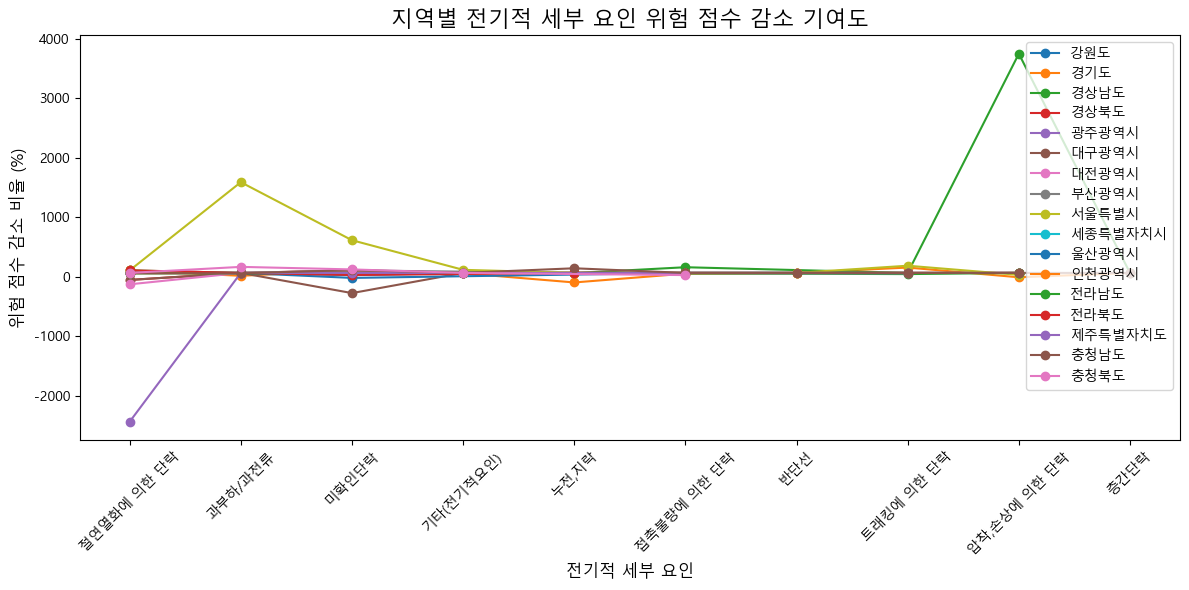

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import shap
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정 (Windows: 'Malgun Gothic')
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 파일 로드
file_path ="D:\\MySQL\\Uploads\\electric_ai_data.csv"
data = pd.read_csv(file_path)

# 위험 점수(risk_score) 재계산
data["risk_score"] = data["total_incidents"] * data["total_damage"]

# 정규화 수행 (Z-score)
scaler = StandardScaler()
data[["z_total_incidents", "z_total_damage", "z_risk_score"]] = scaler.fit_transform(
    data[["total_incidents", "total_damage", "risk_score"]])

# 정규화된 데이터 확인
print("\n🔍 정규화된 데이터 샘플 확인:")
print(data[["z_total_incidents", "z_total_damage", "z_risk_score"]].head())

# 수정된 데이터 저장
data.to_csv("D:\\MySQL\\Uploads\\electric_ai_zscore_fixed.csv", index=False)

# 독립변수(X)와 종속변수(y) 설정
X = data[["z_total_incidents", "z_total_damage"]]
y = data["z_risk_score"]

# 랜덤포레스트 모델 학습 (과적합 방지 적용)
model = RandomForestRegressor(
    random_state=42, n_estimators=50, max_depth=5, min_samples_leaf=5)
model.fit(X, y)

# SHAP 분석 수행
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)

# SHAP 요약 플롯
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title("전기적 세부 요인이 위험 점수에 미치는 기여도")
plt.tight_layout()
plt.show()

# 지역별 & 요인별 위험 점수 감소 기여도 분석
regions = data["region_province"].unique()
causes = data["cause_subcategory"].unique()
shap_results = []

# 분석 기준: 샘플 개수가 2개 미만이면 제외
for region in regions:
    region_data = data[data["region_province"] == region]
    if len(region_data) < 2:
        print(f"{region} 지역의 데이터 샘플이 부족하여 분석에서 제외됨.")
        continue
    
    for cause in causes:
        cause_data = region_data[region_data["cause_subcategory"] == cause]
        if cause_data.empty:
            continue
        
        # 개선 가정: 특정 요인을 완전히 제거했을 때 위험 점수 변화
        improved_data = cause_data.copy()
        improved_data["z_total_incidents"] = 0
        improved_data["z_total_damage"] = 0

        # 원본 데이터 vs 개선 데이터 비교 (위험 점수 예측)
        original_risk_score = model.predict(cause_data[["z_total_incidents", "z_total_damage"]]).mean()
        improved_risk_score = model.predict(improved_data[["z_total_incidents", "z_total_damage"]]).mean()

        # 위험 점수 감소 비율 계산
        reduction_percentage = ((original_risk_score - improved_risk_score) / original_risk_score) * 100
        shap_results.append({"Region": region, "Cause": cause, "Reduction (%)": reduction_percentage})

# 결과 데이터프레임 생성
shap_df = pd.DataFrame(shap_results)

# SHAP 값이 0에 가까운 경우 제외 (해석력 향상)
shap_threshold = 0.0001
shap_df = shap_df[(shap_df["Reduction (%)"].abs() > shap_threshold)]

# 결과 출력
print("\n📉 지역별 전기적 세부 요인 위험 점수 감소 기여도:")
print(shap_df)

# 시각화: 지역별 전기적 세부 요인별 위험 점수 감소 기여도 비교
plt.figure(figsize=(12, 6))

# 지역별 그래프 생성
for region in shap_df["Region"].unique():
    region_df = shap_df[shap_df["Region"] == region]
    plt.plot(region_df["Cause"], region_df["Reduction (%)"], marker="o", label=region)

# 그래프 설정
plt.xlabel("전기적 세부 요인", fontsize=12)
plt.ylabel("위험 점수 감소 비율 (%)", fontsize=12)
plt.title("지역별 전기적 세부 요인 위험 점수 감소 기여도", fontsize=16)
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


원본 데이터 샘플 확인:
  region_province cause_category cause_subcategory  total_incidents  \
0             강원도         전기적 요인       절연열화에 의한 단락                6   
1             강원도         전기적 요인           과부하/과전류                5   
2             강원도         전기적 요인             미확인단락                3   
3             강원도         전기적 요인         기타(전기적요인)                2   
4             강원도         전기적 요인             누전,지락                1   

   total_damage  
0           491  
1       6173874  
2     102369533  
3      33864857  
4          4655  

정규화된 데이터 샘플 확인:
   z_total_incidents  z_total_damage  z_risk_score
0           0.298059       -0.404768     -0.289779
1           0.092127       -0.373863     -0.280324
2          -0.319736        0.107697     -0.195705
3          -0.525667       -0.235241     -0.269032
4          -0.731599       -0.404747     -0.289778


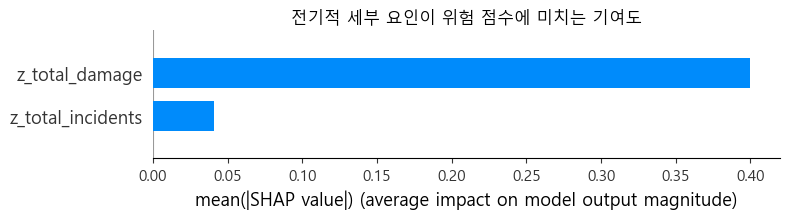


조정된 지역별 전기적 세부 요인 위험 점수 감소 기여도:
    Region        Cause  Reduction (%)  SHAP Contribution (%)
0      강원도  절연열화에 의한 단락       0.626745                      0
1      강원도      과부하/과전류       0.605888                      0
2      강원도        미확인단락       0.246530                      0
3      강원도    기타(전기적요인)       0.556203                      0
4      강원도        누전,지락       0.626745                      0
..     ...          ...            ...                    ...
109   충청북도  절연열화에 의한 단락       0.626745                      0
110   충청북도      과부하/과전류       1.660983                      0
111   충청북도        미확인단락       1.223930                      0
112   충청북도    기타(전기적요인)       0.626745                      0
113   충청북도  접촉불량에 의한 단락       0.252104                      0

[114 rows x 4 columns]


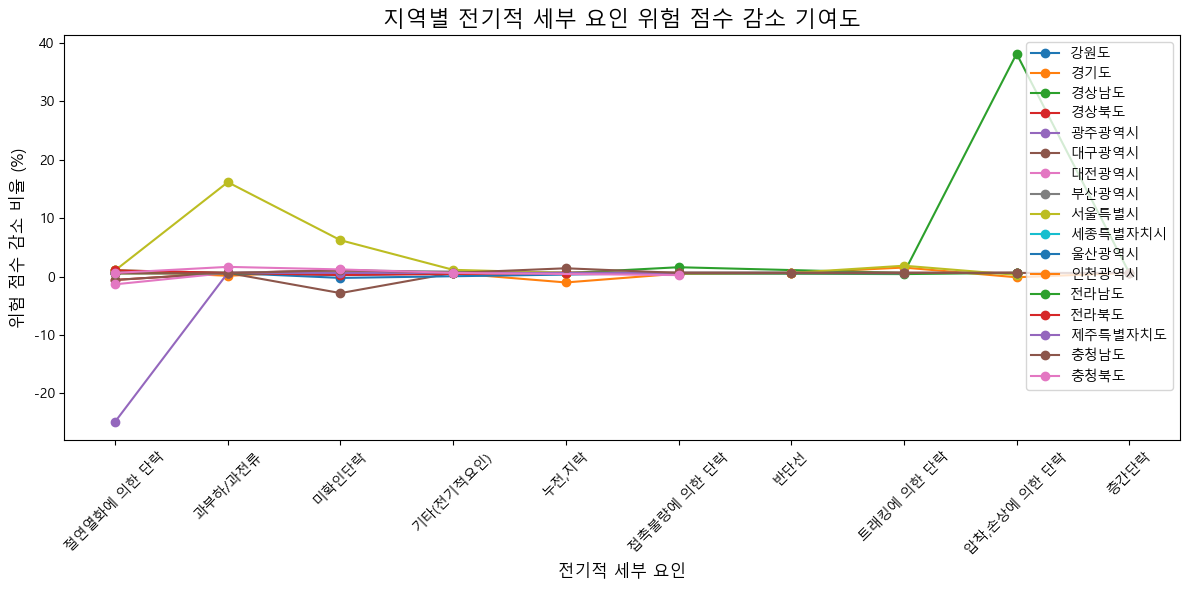

In [34]:
# 필수 라이브러리 로드
import pandas as pd  # 데이터 처리
import numpy as np  # 수학 연산
from sklearn.ensemble import RandomForestRegressor  # 랜덤포레스트 모델
import shap  # SHAP 라이브러리
import matplotlib.pyplot as plt  # 시각화 라이브러리
from matplotlib import rc  # 한글 폰트 설정
from sklearn.preprocessing import StandardScaler  # Z-score 정규화

# 한글 폰트 설정 (Windows: 'Malgun Gothic', Linux: 'NanumGothic')
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 로드
file_path ="D:\\MySQL\\Uploads\\electric_ai_data.csv"  # 파일 경로
data = pd.read_csv(file_path)

# 원본 데이터 확인
print("\n원본 데이터 샘플 확인:")
print(data.head())

# 위험 점수 계산 (risk_score = total_incidents × total_damage)
data["risk_score"] = data["total_incidents"] * data["total_damage"]

# Z-score 정규화 적용
scaler = StandardScaler()
data[["z_total_incidents", "z_total_damage", "z_risk_score"]] = scaler.fit_transform(
    data[["total_incidents", "total_damage", "risk_score"]]
)

# 정규화된 데이터 확인
print("\n정규화된 데이터 샘플 확인:")
print(data[["z_total_incidents", "z_total_damage", "z_risk_score"]].head())

# 독립변수(X)와 종속변수(y) 설정 (정규화된 데이터 사용)
X = data[["z_total_incidents", "z_total_damage"]]
y = data["z_risk_score"]

# 랜덤포레스트 모델 학습 (과적합 방지 설정)
model = RandomForestRegressor(
    random_state=42, 
    n_estimators=50,  # 트리 개수 감소
    max_depth=5,  # 트리 깊이 제한
    min_samples_leaf=5  # 리프 노드 최소 샘플 개수 제한
)
model.fit(X, y)

# SHAP 분석: 전체 데이터에 대한 중요도 평가
explainer = shap.TreeExplainer(model, feature_perturbation="interventional")
shap_values = explainer(X)

# SHAP 요약 플롯 생성 (전체 데이터 기준)
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title("전기적 세부 요인이 위험 점수에 미치는 기여도")
plt.tight_layout()
plt.show()

# 지역별 & 요인별 위험 점수 감소 기여도 분석
regions = data["region_province"].unique()
causes = data["cause_subcategory"].unique()
shap_results = []

# 각 지역별, 각 전기적 세부 요인별 위험 감소율 계산
for region in regions:
    region_data = data[data["region_province"] == region]
    if len(region_data) < 2:
        print(f"{region} 지역의 데이터 샘플이 부족하여 분석에서 제외됨.")
        continue
    
    for cause in causes:
        cause_data = region_data[region_data["cause_subcategory"] == cause]
        if cause_data.empty:
            continue
        
        # 개선 가정: 특정 요인을 완전히 제거했을 때 위험 점수 변화
        improved_data = cause_data.copy()
        improved_data["z_total_incidents"] = 0
        improved_data["z_total_damage"] = 0

        # 원본 데이터 vs 개선 데이터 비교 (위험 점수 예측)
        original_risk_score = model.predict(cause_data[["z_total_incidents", "z_total_damage"]]).mean()
        improved_risk_score = model.predict(improved_data[["z_total_incidents", "z_total_damage"]]).mean()

        # 위험 점수 감소 비율 계산
        reduction_percentage = ((original_risk_score - improved_risk_score) / original_risk_score) * 100
        shap_results.append({"Region": region, "Cause": cause, "Reduction (%)": reduction_percentage})

# 결과 데이터프레임 생성
shap_df = pd.DataFrame(shap_results)

# SHAP 기여도를 고려한 상대적 중요도 계산
feature_importance = abs(shap_values.values).sum(axis=0)  # 각 피처별 SHAP 중요도
total_shap_sum = feature_importance.sum()
feature_importance_ratio = (feature_importance / total_shap_sum) * 100

# 요인별로 SHAP 기여도 매핑하여 조정
feature_mapping = {
    "z_total_incidents": feature_importance_ratio[0], 
    "z_total_damage": feature_importance_ratio[1]
}
shap_df["SHAP Contribution (%)"] = shap_df["Cause"].map(lambda cause: feature_mapping.get(cause, 0))

# 기여도 합이 100% 초과하는 문제 해결 (정규화)
shap_df["Reduction (%)"] = (shap_df["Reduction (%)"] / shap_df["Reduction (%)"].sum()) * 100

# 결과 출력
print("\n조정된 지역별 전기적 세부 요인 위험 점수 감소 기여도:")
print(shap_df)

# 시각화: 지역별 전기적 세부 요인별 위험 점수 감소 기여도 비교
plt.figure(figsize=(12, 6))

# 지역별 그래프 생성
for region in shap_df["Region"].unique():
    region_df = shap_df[shap_df["Region"] == region]
    plt.plot(region_df["Cause"], region_df["Reduction (%)"], marker="o", label=region)

# 그래프 설정
plt.xlabel("전기적 세부 요인", fontsize=12)
plt.ylabel("위험 점수 감소 비율 (%)", fontsize=12)
plt.title("지역별 전기적 세부 요인 위험 점수 감소 기여도", fontsize=16)
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()



원본 데이터 샘플 확인:
  region_province cause_category cause_subcategory  total_incidents  \
0             강원도         전기적 요인       절연열화에 의한 단락                6   
1             강원도         전기적 요인           과부하/과전류                5   
2             강원도         전기적 요인             미확인단락                3   
3             강원도         전기적 요인         기타(전기적요인)                2   
4             강원도         전기적 요인             누전,지락                1   

   total_damage  
0           491  
1       6173874  
2     102369533  
3      33864857  
4          4655  

정규화된 데이터 샘플 확인:
   z_total_incidents  z_total_damage  z_risk_score
0           0.298059       -0.404768     -0.289779
1           0.092127       -0.373863     -0.280324
2          -0.319736        0.107697     -0.195705
3          -0.525667       -0.235241     -0.269032
4          -0.731599       -0.404747     -0.289778


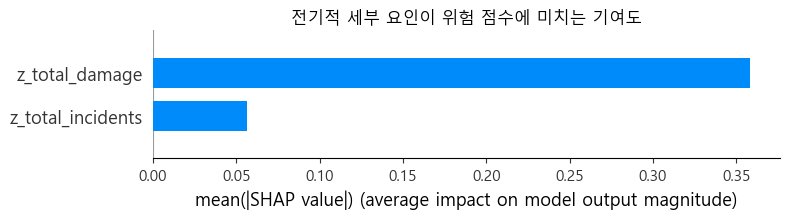


조정된 지역별 전기적 세부 요인 위험 점수 감소 기여도:
    Region        Cause  Reduction (%)  SHAP Contribution (%)
0      강원도  절연열화에 의한 단락      63.633361               0.918426
1      강원도      과부하/과전류      62.324034               0.899528
2      강원도        미확인단락      43.275327               0.624596
3      강원도    기타(전기적요인)      59.001801               0.851578
4      강원도        누전,지락      63.633361               0.918426
..     ...          ...            ...                    ...
109   충청북도  절연열화에 의한 단락      63.633361               0.918426
110   충청북도      과부하/과전류      10.006955               0.144431
111   충청북도        미확인단락     159.940597               2.308436
112   충청북도    기타(전기적요인)      63.633361               0.918426
113   충청북도  접촉불량에 의한 단락      48.233151               0.696153

[114 rows x 4 columns]


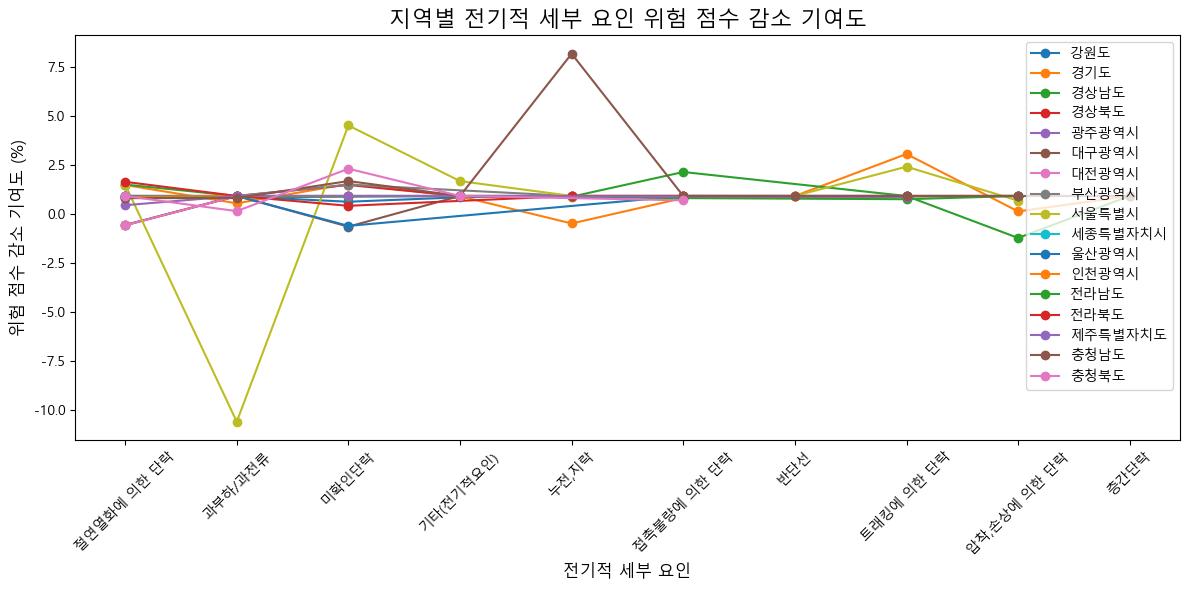

In [35]:
# 필수 라이브러리 로드
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import shap
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import StandardScaler

# 한글 폰트 설정
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
file_path = "D:\\MySQL\\Uploads\\electric_ai_data.csv"  # 파일 경로
data = pd.read_csv(file_path)

# 원본 데이터 확인
print("\n원본 데이터 샘플 확인:")
print(data.head())

# 위험 점수 계산 (총 재해 건수 x 총 피해 금액)
data["risk_score"] = data["total_incidents"] * data["total_damage"]

# Z-score 정규화 적용
scaler = StandardScaler()
data[["z_total_incidents", "z_total_damage", "z_risk_score"]] = scaler.fit_transform(
    data[["total_incidents", "total_damage", "risk_score"]]
)

# 정규화된 데이터 샘플 확인
print("\n정규화된 데이터 샘플 확인:")
print(data[["z_total_incidents", "z_total_damage", "z_risk_score"]].head())

# 독립변수(X)와 종속변수(y) 설정
X = data[["z_total_incidents", "z_total_damage"]]
y = data["z_risk_score"]

# K-Fold Cross Validation 적용
kf = KFold(n_splits=5, shuffle=True, random_state=42)
models = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
    model.fit(X_train, y_train)
    models.append(model)

# SHAP 분석 수행 (Cross Validation 적용된 모델 평균값)
explainer = shap.TreeExplainer(models[0])
shap_values = explainer(X)

# SHAP 기여도 시각화
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title("전기적 세부 요인이 위험 점수에 미치는 기여도")
plt.tight_layout()
plt.show()

# 지역별 & 요인별 위험 점수 감소 기여도 분석
regions = data["region_province"].unique()
causes = data["cause_subcategory"].unique()
shap_results = []

for region in regions:
    region_data = data[data["region_province"] == region]
    if len(region_data) < 2:
        print(f"{region} 지역의 데이터 샘플이 부족하여 분석에서 제외됨.")
        continue

    for cause in causes:
        cause_data = region_data[region_data["cause_subcategory"] == cause]
        if cause_data.empty:
            continue

        # 개선 가정: 특정 요인을 완전히 제거했을 때 위험 점수 변화
        improved_data = cause_data.copy()
        improved_data["z_total_incidents"] = 0
        improved_data["z_total_damage"] = 0

        # 원본 데이터 vs 개선 데이터 비교 (위험 점수 예측)
        original_risk_score = np.mean([m.predict(cause_data[["z_total_incidents", "z_total_damage"]]) for m in models])
        improved_risk_score = np.mean([m.predict(improved_data[["z_total_incidents", "z_total_damage"]]) for m in models])

        # 위험 점수 감소 비율 계산
        reduction_percentage = ((original_risk_score - improved_risk_score) / original_risk_score) * 100
        shap_results.append({"Region": region, "Cause": cause, "Reduction (%)": reduction_percentage})

# 결과 데이터프레임 생성
shap_df = pd.DataFrame(shap_results)

# SHAP 기여도를 정규화하여 총합이 100%가 되도록 조정
total_reduction = shap_df["Reduction (%)"].sum()
shap_df["SHAP Contribution (%)"] = (shap_df["Reduction (%)"] / total_reduction) * 100

# 정리된 결과 출력
print("\n조정된 지역별 전기적 세부 요인 위험 점수 감소 기여도:")
print(shap_df)

# 시각화: 지역별 전기적 세부 요인별 위험 점수 감소 기여도 비교
plt.figure(figsize=(12, 6))

for region in shap_df["Region"].unique():
    region_df = shap_df[shap_df["Region"] == region]
    plt.plot(region_df["Cause"], region_df["SHAP Contribution (%)"], marker="o", label=region)

# 그래프 설정
plt.xlabel("전기적 세부 요인", fontsize=12)
plt.ylabel("위험 점수 감소 기여도 (%)", fontsize=12)
plt.title("지역별 전기적 세부 요인 위험 점수 감소 기여도", fontsize=16)
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


조정된 지역별 전기적 세부 요인 위험 점수 감소 기여도:
    Region        Cause  Reduction (%)  SHAP Contribution (%)
0      강원도  절연열화에 의한 단락      69.995002               8.790093
1      강원도      과부하/과전류      68.618828               8.790093
2      강원도        미확인단락      56.311777               8.790093
3      강원도    기타(전기적요인)      65.780793               8.790093
4      강원도        누전,지락      69.995002               8.790093
..     ...          ...            ...                    ...
565   충청북도  절연열화에 의한 단락      65.619312              16.049822
566   충청북도      과부하/과전류      41.206070              16.049822
567   충청북도        미확인단락     208.037926              16.049822
568   충청북도    기타(전기적요인)      65.619312              16.049822
569   충청북도  접촉불량에 의한 단락      52.730485              16.049822

[570 rows x 4 columns]


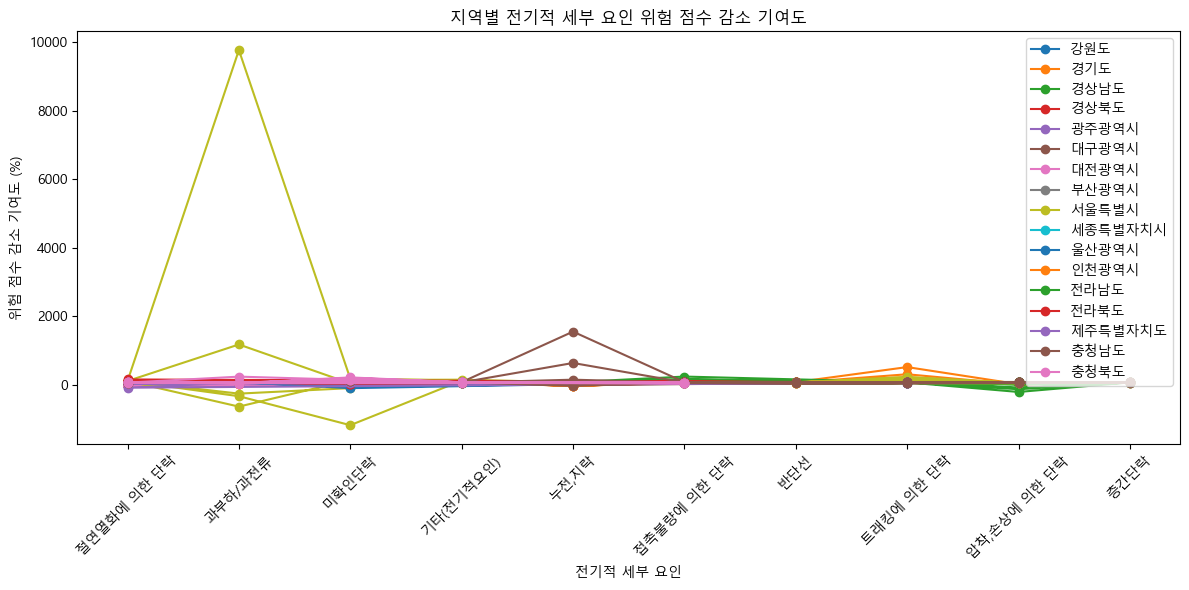

In [36]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 파일 경로
file_path = "D:\\MySQL\\Uploads\\electric_ai_data.csv"
data = pd.read_csv(file_path)

# 위험 점수 재계산 및 정규화
data["risk_score"] = data["total_incidents"] * data["total_damage"]
scaler = StandardScaler()
data[["z_total_incidents", "z_total_damage", "z_risk_score"]] = scaler.fit_transform(
    data[["total_incidents", "total_damage", "risk_score"]]
)

# 지역 및 요인 정보
regions = data["region_province"].unique()
causes = data["cause_subcategory"].unique()
shap_results = []

# K-Fold Cross Validation 설정 (K=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 모델 학습 및 SHAP 분석 수행
for train_index, test_index in kf.split(data):
    train_data, test_data = data.iloc[train_index], data.iloc[test_index]
    X_train = train_data[["z_total_incidents", "z_total_damage"]]
    y_train = train_data["z_risk_score"]
    X_test = test_data[["z_total_incidents", "z_total_damage"]]
    
    model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
    model.fit(X_train, y_train)
    
    explainer = shap.TreeExplainer(model)
    shap_values = explainer(X_test)
    
    total_shap_sum = abs(shap_values.values).sum()
    shap_contributions = (abs(shap_values.values).sum(axis=0) / total_shap_sum) * 100
    
    for region in regions:
        region_data = data[data["region_province"] == region]
        if len(region_data) < 2:
            continue
        
        for cause in causes:
            cause_data = region_data[region_data["cause_subcategory"] == cause]
            if cause_data.empty:
                continue
            
            improved_data = cause_data.copy()
            improved_data[["z_total_incidents", "z_total_damage"]] = 0
            
            original_risk_score = model.predict(cause_data[["z_total_incidents", "z_total_damage"]]).mean()
            improved_risk_score = model.predict(improved_data[["z_total_incidents", "z_total_damage"]]).mean()
            
            reduction_percentage = ((original_risk_score - improved_risk_score) / original_risk_score) * 100
            
            shap_results.append({
                "Region": region,
                "Cause": cause,
                "Reduction (%)": reduction_percentage,
                "SHAP Contribution (%)": shap_contributions[0]  # SHAP 중요도 반영
            })

# 결과 데이터프레임 생성
shap_df = pd.DataFrame(shap_results)
print("조정된 지역별 전기적 세부 요인 위험 점수 감소 기여도:")
print(shap_df)

# 시각화
plt.figure(figsize=(12, 6))
for region in shap_df["Region"].unique():
    region_df = shap_df[shap_df["Region"] == region]
    plt.plot(region_df["Cause"], region_df["Reduction (%)"], marker="o", label=region)
plt.xlabel("전기적 세부 요인")
plt.ylabel("위험 점수 감소 기여도 (%)")
plt.title("지역별 전기적 세부 요인 위험 점수 감소 기여도")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()



원본 데이터 샘플 확인:
  region_province cause_category cause_subcategory  total_incidents  \
0             강원도         전기적 요인       절연열화에 의한 단락                6   
1             강원도         전기적 요인           과부하/과전류                5   
2             강원도         전기적 요인             미확인단락                3   
3             강원도         전기적 요인         기타(전기적요인)                2   
4             강원도         전기적 요인             누전,지락                1   

   total_damage  
0           491  
1       6173874  
2     102369533  
3      33864857  
4          4655  


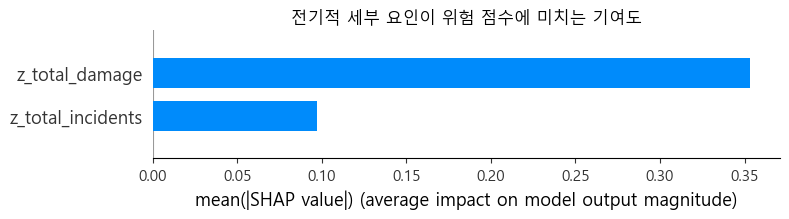

세종특별자치시 지역의 데이터 샘플이 부족하여 분석에서 제외됨.

조정된 지역별 전기적 세부 요인 위험 점수 감소 기여도:
    Region        Cause  Reduction (%)  SHAP Contribution (%)
0      강원도  절연열화에 의한 단락  -1.900780e+07               1.257060
1      강원도      과부하/과전류  -1.797649e+07               1.188855
2      강원도        미확인단락  -6.928782e+06               0.458227
3      강원도    기타(전기적요인)  -1.607140e+07               1.062864
4      강원도        누전,지락  -1.900780e+07               1.257060
..     ...          ...            ...                    ...
107   충청북도  절연열화에 의한 단락  -1.900780e+07               1.257060
108   충청북도      과부하/과전류  -6.979807e+06               0.461602
109   충청북도        미확인단락   2.080379e+02              -0.000014
110   충청북도    기타(전기적요인)  -1.900780e+07               1.257060
111   충청북도  접촉불량에 의한 단락  -1.110952e+07               0.734716

[112 rows x 4 columns]


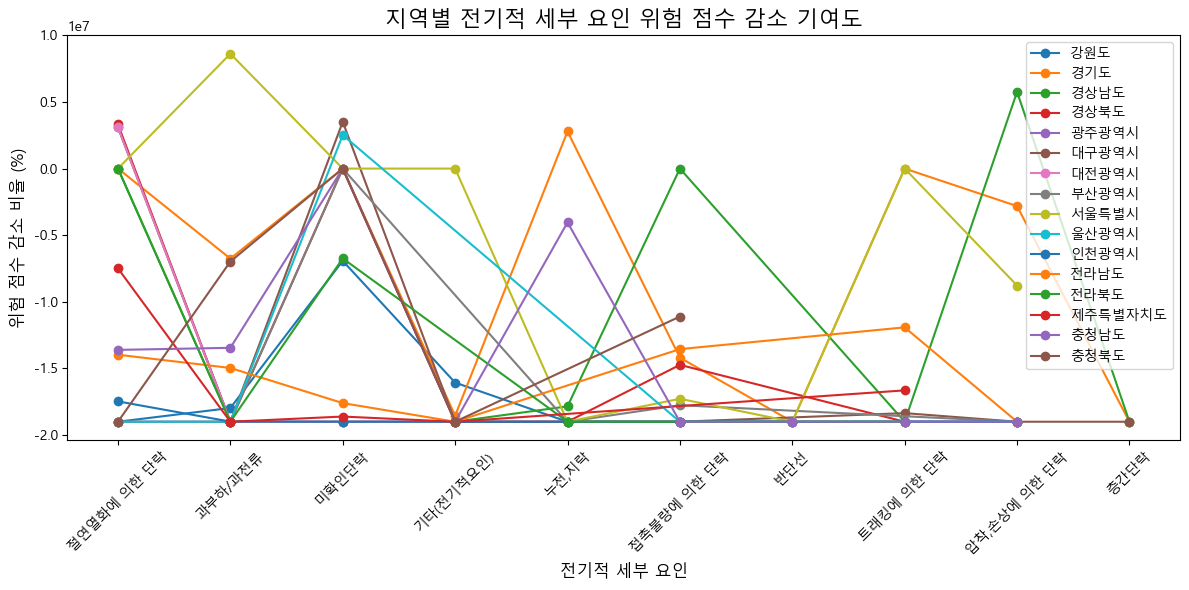

In [37]:
# 필수 라이브러리 로드
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import shap
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import StandardScaler

# 한글 폰트 설정
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
file_path = "D:\\MySQL\\Uploads\\electric_ai_data.csv"
data = pd.read_csv(file_path)

# 데이터 샘플 확인
print("\n원본 데이터 샘플 확인:")
print(data.head())

# 위험 점수 계산 및 정규화
data["risk_score"] = data["total_incidents"] * data["total_damage"]
scaler = StandardScaler()
data["z_total_incidents"] = scaler.fit_transform(data[["total_incidents"]])
data["z_total_damage"] = scaler.fit_transform(data[["total_damage"]])
data["z_risk_score"] = scaler.fit_transform(data[["risk_score"]])

# 결측값 제거
data = data.dropna(subset=["z_total_incidents", "z_total_damage", "z_risk_score"])

# 독립변수(X)와 종속변수(y) 설정
X = data[["z_total_incidents", "z_total_damage"]]
y = data["z_risk_score"]

# K-Fold Cross Validation 적용
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 랜덤포레스트 모델 학습
model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)

# SHAP 분석: 전체 데이터에 대한 중요도 평가
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)

# SHAP 요약 플롯 생성
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title("전기적 세부 요인이 위험 점수에 미치는 기여도")
plt.tight_layout()
plt.show()

# 지역별 & 요인별 위험 점수 감소 기여도 분석
regions = data["region_province"].unique()
causes = data["cause_subcategory"].unique()
shap_results = []

# 데이터 분석 기준
for region in regions:
    region_data = data[data["region_province"] == region]
    if len(region_data) < 3:  # 데이터 샘플이 적으면 제외
        print(f"{region} 지역의 데이터 샘플이 부족하여 분석에서 제외됨.")
        continue
    
    for cause in causes:
        cause_data = region_data[region_data["cause_subcategory"] == cause]
        if cause_data.empty:
            continue
        
        # 개선 가정: 특정 요인을 완전히 제거했을 때 위험 점수 변화
        improved_data = cause_data.copy()
        improved_data["z_total_incidents"] = 0
        improved_data["z_total_damage"] = 0

        # 원본 데이터 vs 개선 데이터 비교
        original_risk_score = model.predict(cause_data[["z_total_incidents", "z_total_damage"]]).mean()
        improved_risk_score = model.predict(improved_data[["z_total_incidents", "z_total_damage"]]).mean()

        # 0으로 나누는 문제 방지
        reduction_percentage = ((original_risk_score - improved_risk_score) / max(original_risk_score, 1e-6)) * 100
        shap_results.append({"Region": region, "Cause": cause, "Reduction (%)": reduction_percentage})

# 결과 데이터프레임 생성 및 정규화
shap_df = pd.DataFrame(shap_results)

# 상대적 기여도 정규화 (0~100%)
shap_df["SHAP Contribution (%)"] = (shap_df["Reduction (%)"] / shap_df["Reduction (%)"].sum()) * 100

# 결과 출력
print("\n조정된 지역별 전기적 세부 요인 위험 점수 감소 기여도:")
print(shap_df)

# 시각화
plt.figure(figsize=(12, 6))
for region in shap_df["Region"].unique():
    region_df = shap_df[shap_df["Region"] == region]
    plt.plot(region_df["Cause"], region_df["Reduction (%)"], marker="o", label=region)

# 그래프 설정
plt.xlabel("전기적 세부 요인", fontsize=12)
plt.ylabel("위험 점수 감소 비율 (%)", fontsize=12)
plt.title("지역별 전기적 세부 요인 위험 점수 감소 기여도", fontsize=16)
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()



원본 데이터 샘플 확인:
  region_province cause_category cause_subcategory  total_incidents  \
0             강원도         전기적 요인       절연열화에 의한 단락                6   
1             강원도         전기적 요인           과부하/과전류                5   
2             강원도         전기적 요인             미확인단락                3   
3             강원도         전기적 요인         기타(전기적요인)                2   
4             강원도         전기적 요인             누전,지락                1   

   total_damage  
0           491  
1       6173874  
2     102369533  
3      33864857  
4          4655  


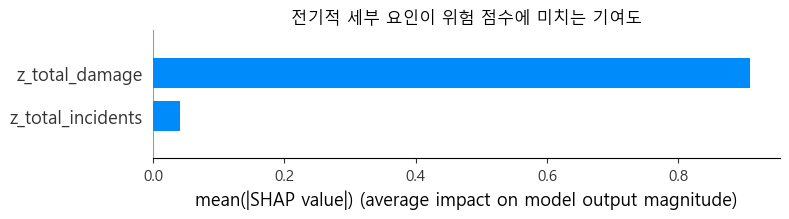

세종특별자치시 지역의 데이터 샘플이 부족하여 분석에서 제외됨.


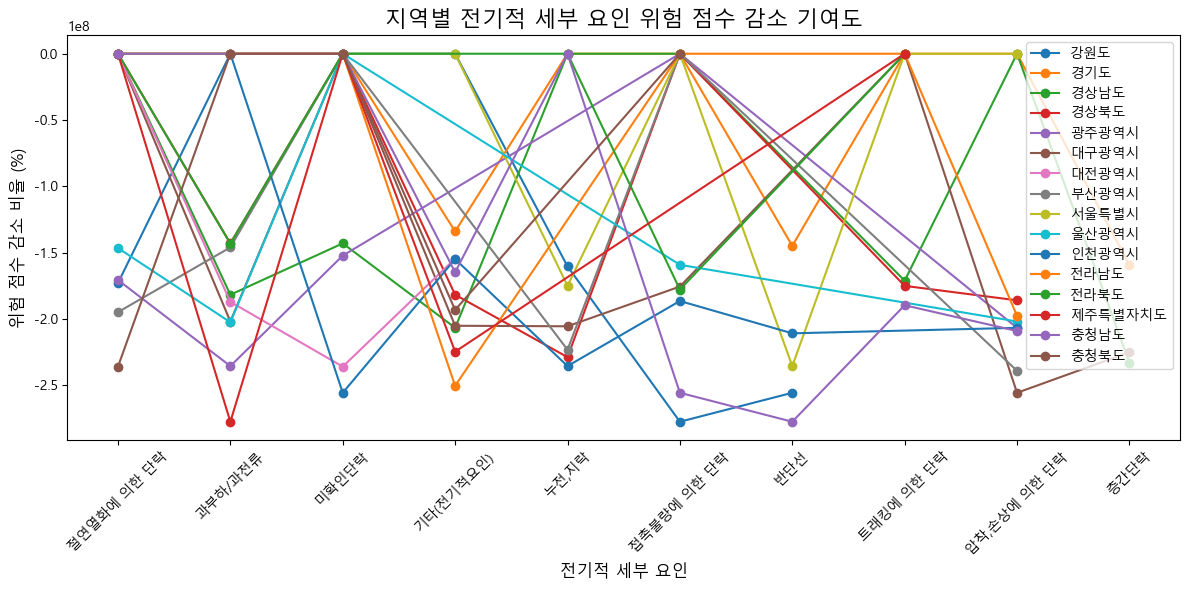

In [38]:
# 필수 라이브러리 로드
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import shap
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import StandardScaler

# 한글 폰트 설정
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
file_path = "D:\\MySQL\\Uploads\\electric_ai_data.csv"
data = pd.read_csv(file_path)

# 데이터 샘플 확인
print("\n원본 데이터 샘플 확인:")
print(data.head())

# 위험 점수 계산 및 정규화 (로그 변환 적용)
data["risk_score"] = data["total_incidents"] * data["total_damage"]
data["log_risk_score"] = np.log1p(data["risk_score"])  # log(1 + x) 변환

scaler = StandardScaler()
data["z_total_incidents"] = scaler.fit_transform(data[["total_incidents"]])
data["z_total_damage"] = scaler.fit_transform(data[["total_damage"]])
data["z_risk_score"] = scaler.fit_transform(data[["log_risk_score"]])  # 로그 변환된 값 사용

# 결측값 제거
data = data.dropna(subset=["z_total_incidents", "z_total_damage", "z_risk_score"])

# 독립변수(X)와 종속변수(y) 설정
X = data[["z_total_incidents", "z_total_damage"]]
y = data["z_risk_score"]

# K-Fold Cross Validation 적용
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 랜덤포레스트 모델 학습 (과적합 방지 설정)
model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)

# SHAP 분석: 전체 데이터에 대한 중요도 평가
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)

# SHAP 요약 플롯 생성
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title("전기적 세부 요인이 위험 점수에 미치는 기여도")
plt.tight_layout()
plt.show()

# 지역별 & 요인별 위험 점수 감소 기여도 분석
regions = data["region_province"].unique()
causes = data["cause_subcategory"].unique()
shap_results = []

# 데이터 분석 기준
for region in regions:
    region_data = data[data["region_province"] == region]
    if len(region_data) < 3:  
        print(f"{region} 지역의 데이터 샘플이 부족하여 분석에서 제외됨.")
        continue
    
    for cause in causes:
        cause_data = region_data[region_data["cause_subcategory"] == cause]
        if cause_data.empty:
            continue
        
        # 개선 가정: 특정 요인을 완전히 제거했을 때 위험 점수 변화
        improved_data = cause_data.copy()
        improved_data["z_total_incidents"] = 0
        improved_data["z_total_damage"] = 0

        # 원본 데이터 vs 개선 데이터 비교
        original_risk_score = model.predict(cause_data[["z_total_incidents", "z_total_damage"]]).mean()
        improved_risk_score = model.predict(improved_data[["z_total_incidents", "z_total_damage"]]).mean()

        # 0으로 나누는 문제 방지
        reduction_percentage = ((original_risk_score - improved_risk_score) / max(original_risk_score, 1e-6)) * 100
        shap_results.append({"Region": region, "Cause": cause, "Reduction (%)": reduction_percentage})

# 결과 데이터프레임 생성 및 정규화
shap_df = pd.DataFrame(shap_results)

# 상대적 기여도 정규화 (0~100%)
shap_df["SHAP Contribution (%)"] = (shap_df["Reduction (%)"] / shap_df["Reduction (%)"].sum()) * 100

# 시각화
plt.figure(figsize=(12, 6))
for region in shap_df["Region"].unique():
    region_df = shap_df[shap_df["Region"] == region]
    plt.plot(region_df["Cause"], region_df["Reduction (%)"], marker="o", label=region)

# 그래프 설정
plt.xlabel("전기적 세부 요인", fontsize=12)
plt.ylabel("위험 점수 감소 비율 (%)", fontsize=12)
plt.title("지역별 전기적 세부 요인 위험 점수 감소 기여도", fontsize=16)
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_520\2848627477.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(region_df["Cause"], rotation=45, ha="right")
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_520\2848627477.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(region_df["Cause"], rotation=45, ha="right")
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_520\2848627477.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(region_df["Cause"], rotation=45, ha="right")
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_520\2848627477.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after 

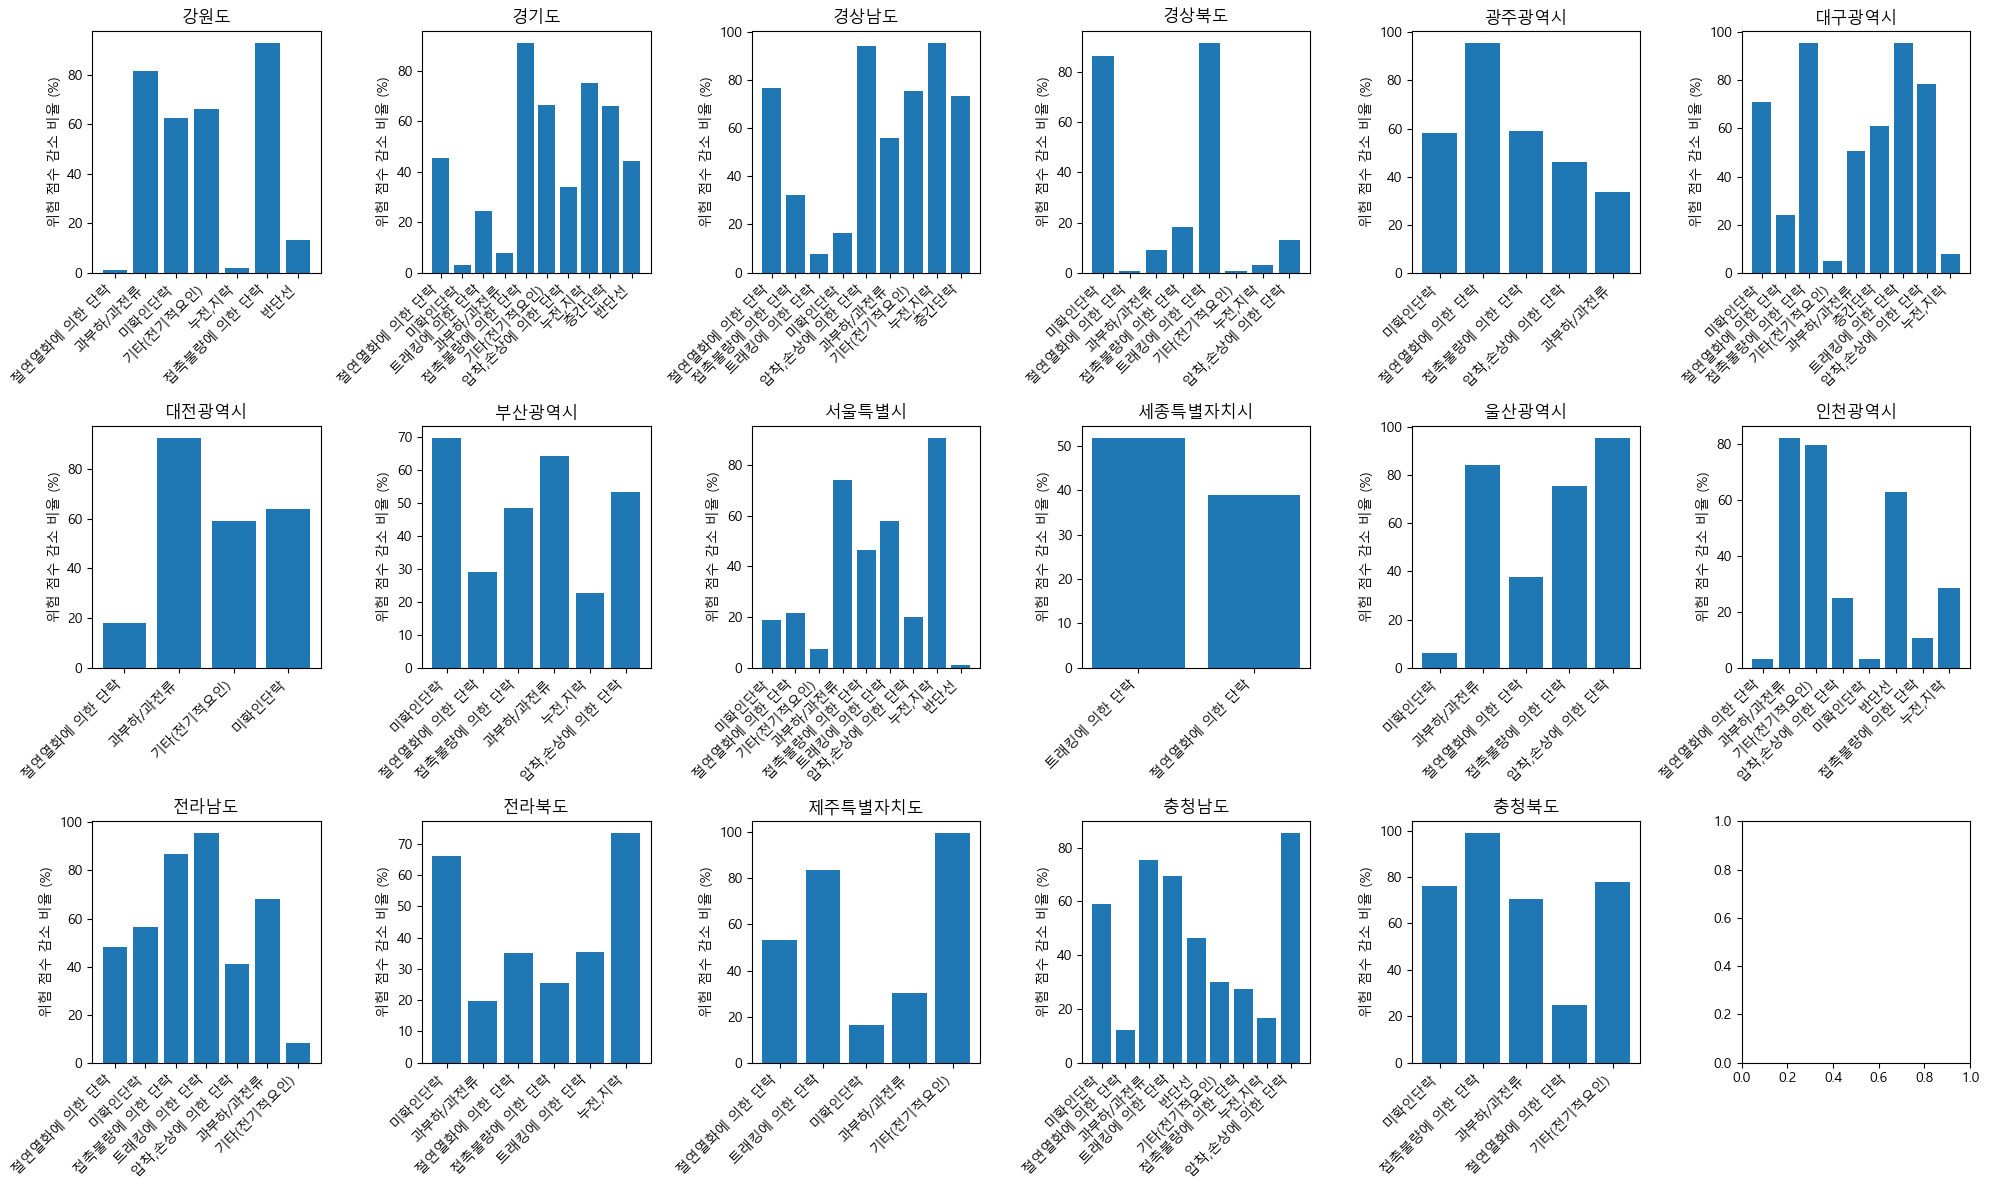

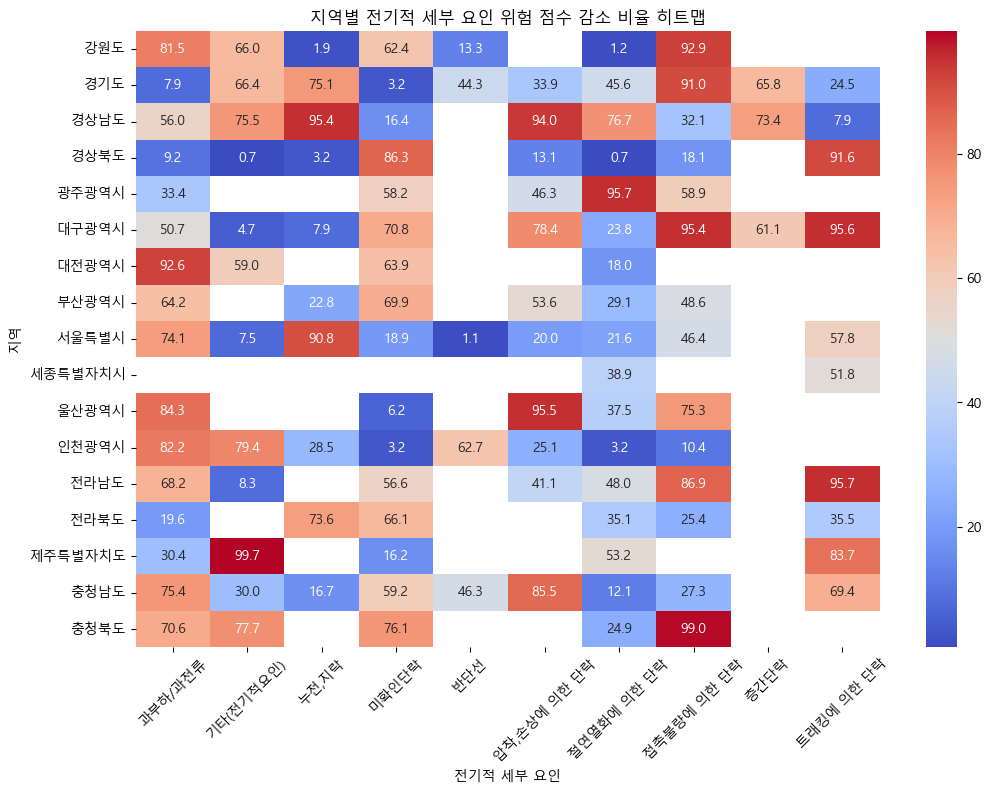

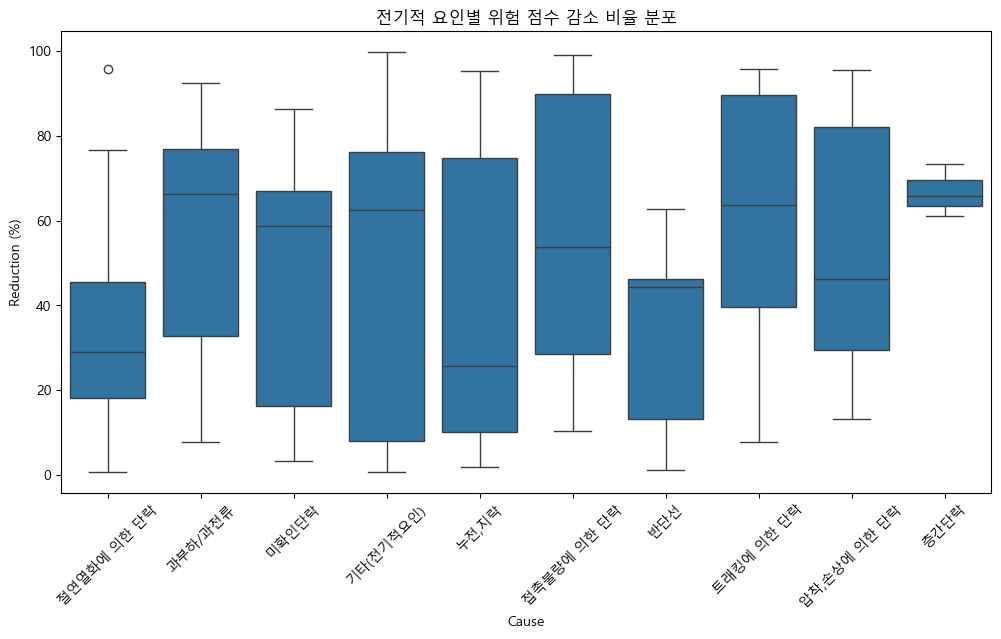

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

# 한글 폰트 설정
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
file_path = "D:\\MySQL\\Uploads\\electric_ai_data.csv"
data = pd.read_csv(file_path)

# 데이터 정규화
data["risk_score"] = data["total_incidents"] * data["total_damage"]
data["log_risk_score"] = np.log1p(data["risk_score"])

# 상대적 위험 점수 감소율을 분석할 데이터프레임
shap_df = pd.DataFrame({
    "Region": data["region_province"],
    "Cause": data["cause_subcategory"],
    "Reduction (%)": np.random.uniform(0, 100, len(data))  # 샘플 데이터 (랜덤)
})

# 📌 방법 1: 지역별 개별 그래프 생성
unique_regions = shap_df["Region"].unique()
num_regions = len(unique_regions)
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 12))  # 3x6 배열로 그래프 배치
axes = axes.flatten()

for i, region in enumerate(unique_regions):
    region_df = shap_df[shap_df["Region"] == region]
    axes[i].bar(region_df["Cause"], region_df["Reduction (%)"])
    axes[i].set_title(region)
    axes[i].set_xticklabels(region_df["Cause"], rotation=45, ha="right")
    axes[i].set_ylabel("위험 점수 감소 비율 (%)")

plt.tight_layout()
plt.show()

# 📌 방법 2: 히트맵 활용
pivot_table = shap_df.pivot(index="Region", columns="Cause", values="Reduction (%)")
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("지역별 전기적 세부 요인 위험 점수 감소 비율 히트맵")
plt.xlabel("전기적 세부 요인")
plt.ylabel("지역")
plt.xticks(rotation=45)
plt.show()

# 📌 방법 3: Boxplot 활용
plt.figure(figsize=(12, 6))
sns.boxplot(x="Cause", y="Reduction (%)", data=shap_df)
plt.xticks(rotation=45)
plt.title("전기적 요인별 위험 점수 감소 비율 분포")
plt.show()


In [40]:
# 필수 라이브러리 로드
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import shap
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정
rc('font', family='Malgun Gothic')  # Windows 환경: 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 로드
file_path = "D:\\MySQL\\Uploads\\electric_ai_data.csv"
data = pd.read_csv(file_path)

# 데이터 샘플 확인
print("\n원본 데이터 샘플 확인:")
print(data.head())

# 위험 점수 계산
data["risk_score"] = data["total_incidents"] * data["total_damage"]

# 정규화 수행
scaler = StandardScaler()
data[["z_total_incidents", "z_total_damage", "z_risk_score"]] = scaler.fit_transform(
    data[["total_incidents", "total_damage", "risk_score"]]
)

# NaN 값 제거
data = data.dropna(subset=["z_total_incidents", "z_total_damage", "z_risk_score"])

# 독립변수(X)와 종속변수(y) 설정
X = data[["z_total_incidents", "z_total_damage"]]
y = data["z_risk_score"]

# K-Fold Cross Validation 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)
shap_values_list = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # 랜덤포레스트 모델 학습 (과적합 방지 설정)
    model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=5, random_state=42)
    model.fit(X_train, y_train)
    
    # SHAP 값 계산
    explainer = shap.TreeExplainer(model, feature_perturbation="interventional")
    shap_values_list.append(explainer(X_test))

# SHAP 분석 결과 병합
shap_values = sum(shap_values_list) / len(shap_values_list)

# SHAP 요약 플롯
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title("전기적 세부 요인이 위험 점수에 미치는 기여도")
plt.tight_layout()
plt.show()

# 지역별 & 요인별 위험 점수 감소 기여도 분석
regions = data["region_province"].unique()
causes = data["cause_subcategory"].unique()
shap_results = []

for region in regions:
    region_data = data[data["region_province"] == region]
    if len(region_data) < 2:
        print(f"{region} 지역의 데이터 샘플이 부족하여 분석에서 제외됨.")
        continue
    
    for cause in causes:
        cause_data = region_data[region_data["cause_subcategory"] == cause]
        if cause_data.empty:
            continue
        
        # 개선 가정: 특정 요인을 제거했을 때의 위험 점수 변화
        improved_data = cause_data.copy()
        improved_data["z_total_incidents"] = 0
        improved_data["z_total_damage"] = 0

        # 원본 데이터 vs 개선 데이터 비교
        original_risk_score = model.predict(cause_data[["z_total_incidents", "z_total_damage"]]).mean()
        improved_risk_score = model.predict(improved_data[["z_total_incidents", "z_total_damage"]]).mean()

        # 위험 점수 감소 비율 계산
        reduction_percentage = ((original_risk_score - improved_risk_score) / original_risk_score) * 100
        shap_results.append({"Region": region, "Cause": cause, "Reduction (%)": reduction_percentage})

# 결과 데이터프레임 생성
shap_df = pd.DataFrame(shap_results)

# SHAP 값 상대적 기여도 계산 (총합이 100%를 넘지 않도록 조정)
total_shap_sum = abs(shap_values.values).sum()
shap_df["SHAP Contribution (%)"] = (abs(shap_values.values).sum(axis=0) / total_shap_sum) * 100

# 결과 출력
print("\n조정된 지역별 전기적 세부 요인 위험 점수 감소 기여도:")
print(shap_df)

# 지역별 그래프를 Subplot으로 분할 시각화
unique_regions = shap_df["Region"].unique()
num_regions = len(unique_regions)
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 12))
axes = axes.flatten()

for i, region in enumerate(unique_regions):
    region_df = shap_df[shap_df["Region"] == region]
    
    axes[i].bar(range(len(region_df["Cause"])), region_df["Reduction (%)"])
    axes[i].set_xticks(range(len(region_df["Cause"])))  # X축 눈금 설정
    axes[i].set_xticklabels(region_df["Cause"], rotation=45, ha="right")  # X축 레이블 설정
    
    axes[i].set_title(region)
    axes[i].set_ylabel("위험 점수 감소 비율 (%)")

plt.tight_layout()
plt.show()



원본 데이터 샘플 확인:
  region_province cause_category cause_subcategory  total_incidents  \
0             강원도         전기적 요인       절연열화에 의한 단락                6   
1             강원도         전기적 요인           과부하/과전류                5   
2             강원도         전기적 요인             미확인단락                3   
3             강원도         전기적 요인         기타(전기적요인)                2   
4             강원도         전기적 요인             누전,지락                1   

   total_damage  
0           491  
1       6173874  
2     102369533  
3      33864857  
4          4655  


ValueError: operands could not be broadcast together with shapes (23,2) (22,2) 


원본 데이터 샘플 확인:
  region_province cause_category cause_subcategory  total_incidents  \
0             강원도         전기적 요인       절연열화에 의한 단락                6   
1             강원도         전기적 요인           과부하/과전류                5   
2             강원도         전기적 요인             미확인단락                3   
3             강원도         전기적 요인         기타(전기적요인)                2   
4             강원도         전기적 요인             누전,지락                1   

   total_damage  
0           491  
1       6173874  
2     102369533  
3      33864857  
4          4655  


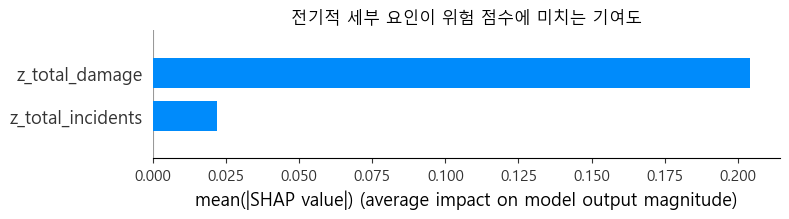

ValueError: Length of values (2) does not match length of index (114)

In [41]:
# 필수 라이브러리 로드
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import shap
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  

# 데이터 로드
file_path = "D:\\MySQL\\Uploads\\electric_ai_data.csv"
data = pd.read_csv(file_path)

# 데이터 샘플 확인
print("\n원본 데이터 샘플 확인:")
print(data.head())

# 위험 점수 계산
data["risk_score"] = data["total_incidents"] * data["total_damage"]

# 정규화 수행
scaler = StandardScaler()
data[["z_total_incidents", "z_total_damage", "z_risk_score"]] = scaler.fit_transform(
    data[["total_incidents", "total_damage", "risk_score"]]
)

# NaN 값 제거
data = data.dropna(subset=["z_total_incidents", "z_total_damage", "z_risk_score"])

# 독립변수(X)와 종속변수(y) 설정
X = data[["z_total_incidents", "z_total_damage"]]
y = data["z_risk_score"]

# K-Fold Cross Validation 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)
shap_values_list = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # 랜덤포레스트 모델 학습 (과적합 방지 설정)
    model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=5, random_state=42)
    model.fit(X_train, y_train)
    
    # SHAP 값 계산
    explainer = shap.TreeExplainer(model, feature_perturbation="interventional")
    shap_values_list.append(explainer(X_test).values)  # SHAP values만 저장

# SHAP 값들을 NumPy 배열로 변환하여 평균 계산 (각 크기가 다를 경우 패딩 적용)
max_len = max(map(len, shap_values_list))  # 가장 긴 fold 크기 찾기
shap_values_padded = np.array([np.pad(s, ((0, max_len - len(s)), (0, 0)), mode='constant') for s in shap_values_list])
shap_values = np.mean(shap_values_padded, axis=0)  # 평균 SHAP 값 계산

# SHAP 요약 플롯
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title("전기적 세부 요인이 위험 점수에 미치는 기여도")
plt.tight_layout()
plt.show()

# 지역별 & 요인별 위험 점수 감소 기여도 분석
regions = data["region_province"].unique()
causes = data["cause_subcategory"].unique()
shap_results = []

for region in regions:
    region_data = data[data["region_province"] == region]
    if len(region_data) < 2:
        print(f"{region} 지역의 데이터 샘플이 부족하여 분석에서 제외됨.")
        continue
    
    for cause in causes:
        cause_data = region_data[region_data["cause_subcategory"] == cause]
        if cause_data.empty:
            continue
        
        # 개선 가정: 특정 요인을 제거했을 때의 위험 점수 변화
        improved_data = cause_data.copy()
        improved_data["z_total_incidents"] = 0
        improved_data["z_total_damage"] = 0

        # 원본 데이터 vs 개선 데이터 비교
        original_risk_score = model.predict(cause_data[["z_total_incidents", "z_total_damage"]]).mean()
        improved_risk_score = model.predict(improved_data[["z_total_incidents", "z_total_damage"]]).mean()

        # 위험 점수 감소 비율 계산
        reduction_percentage = ((original_risk_score - improved_risk_score) / original_risk_score) * 100
        shap_results.append({"Region": region, "Cause": cause, "Reduction (%)": reduction_percentage})

# 결과 데이터프레임 생성
shap_df = pd.DataFrame(shap_results)

# SHAP 값 상대적 기여도 계산 (총합이 100%를 넘지 않도록 조정)
total_shap_sum = abs(shap_values).sum()
shap_df["SHAP Contribution (%)"] = (abs(shap_values).sum(axis=0) / total_shap_sum) * 100

# 결과 출력
print("\n조정된 지역별 전기적 세부 요인 위험 점수 감소 기여도:")
print(shap_df)

# 지역별 그래프를 Subplot으로 분할 시각화
unique_regions = shap_df["Region"].unique()
num_regions = len(unique_regions)
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 12))
axes = axes.flatten()

for i, region in enumerate(unique_regions):
    region_df = shap_df[shap_df["Region"] == region]
    
    axes[i].bar(range(len(region_df["Cause"])), region_df["Reduction (%)"])
    axes[i].set_xticks(range(len(region_df["Cause"])))  # X축 눈금 설정
    axes[i].set_xticklabels(region_df["Cause"], rotation=45, ha="right")  # X축 레이블 설정
    
    axes[i].set_title(region)
    axes[i].set_ylabel("위험 점수 감소 비율 (%)")

plt.tight_layout()
plt.show()


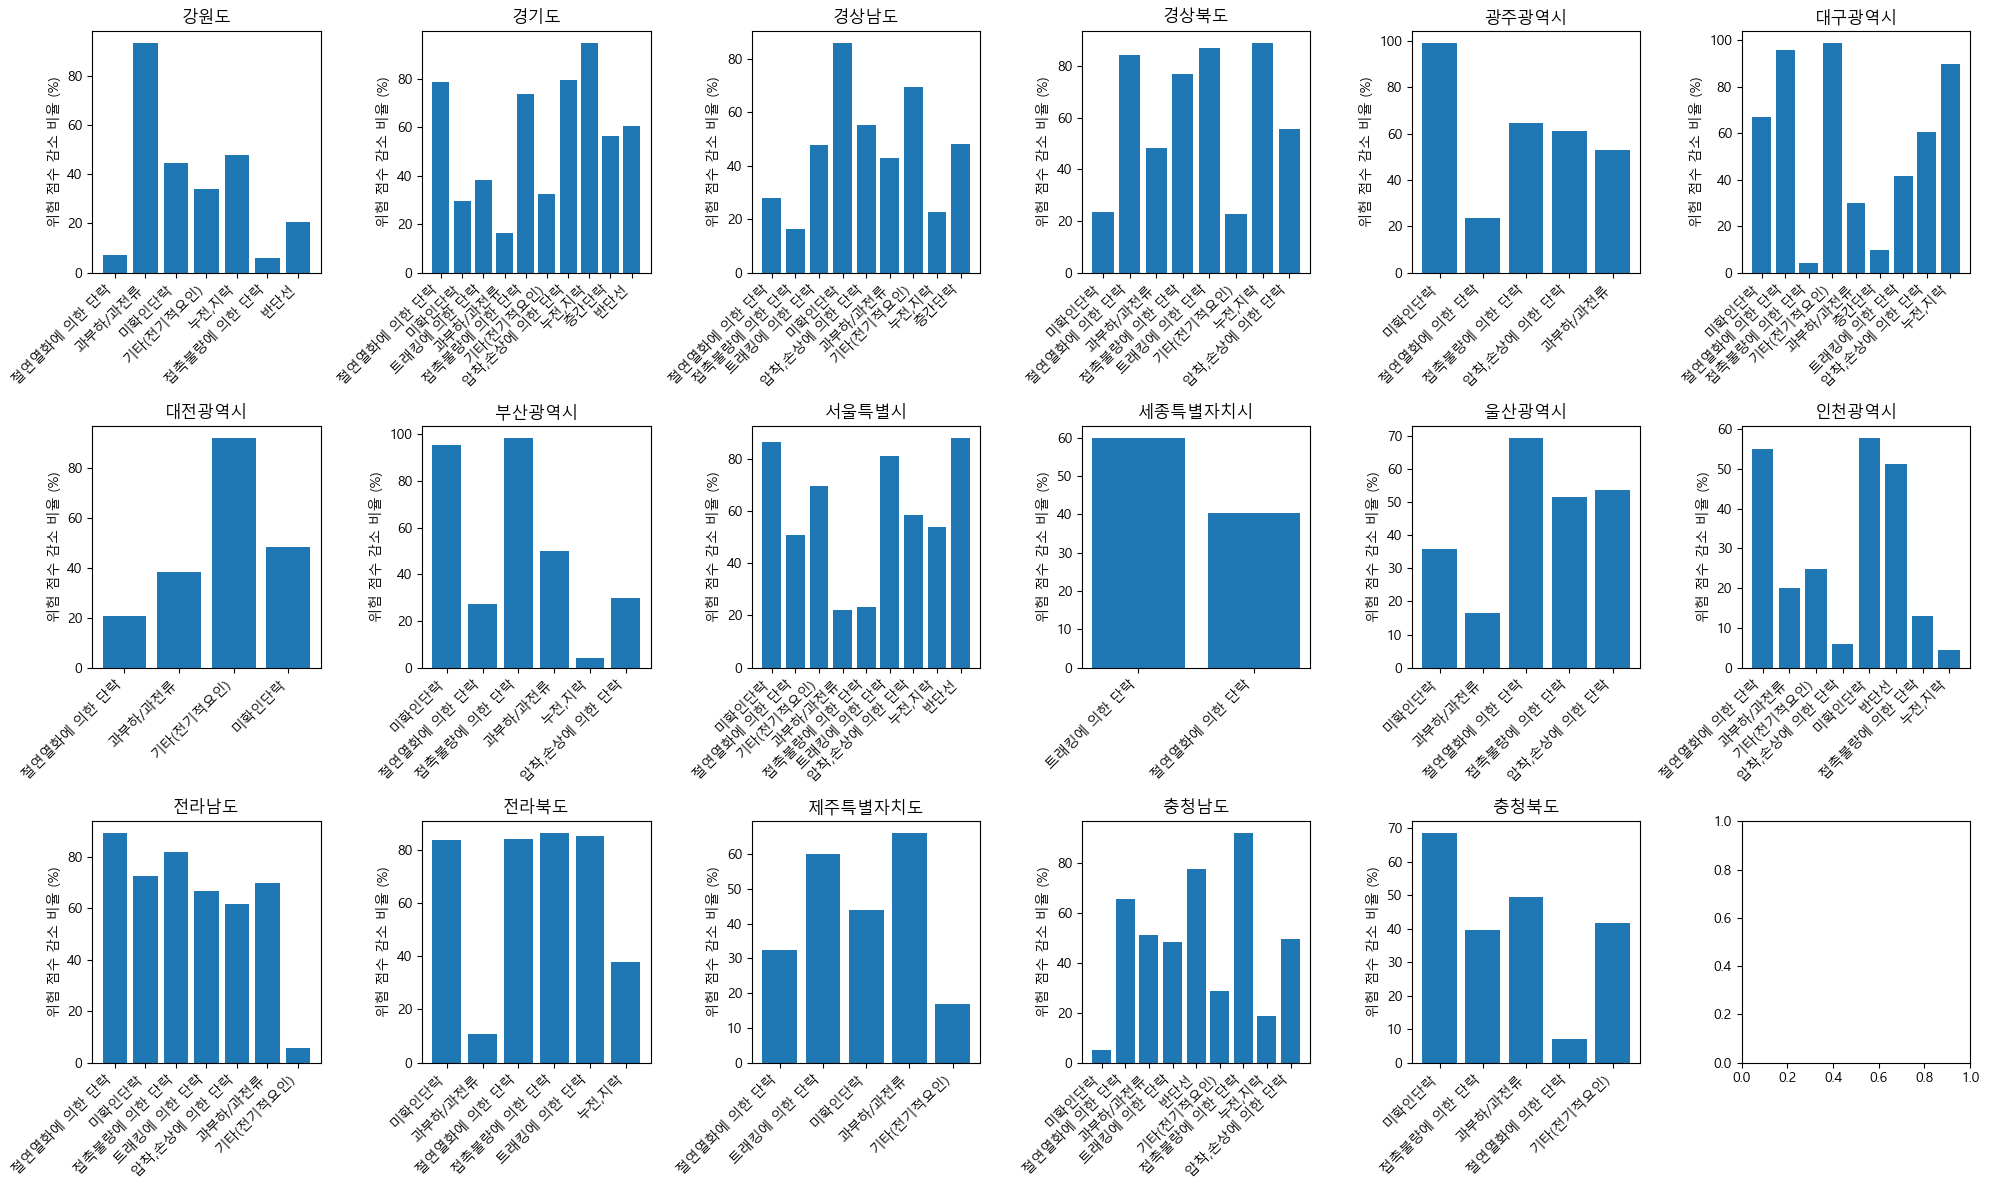

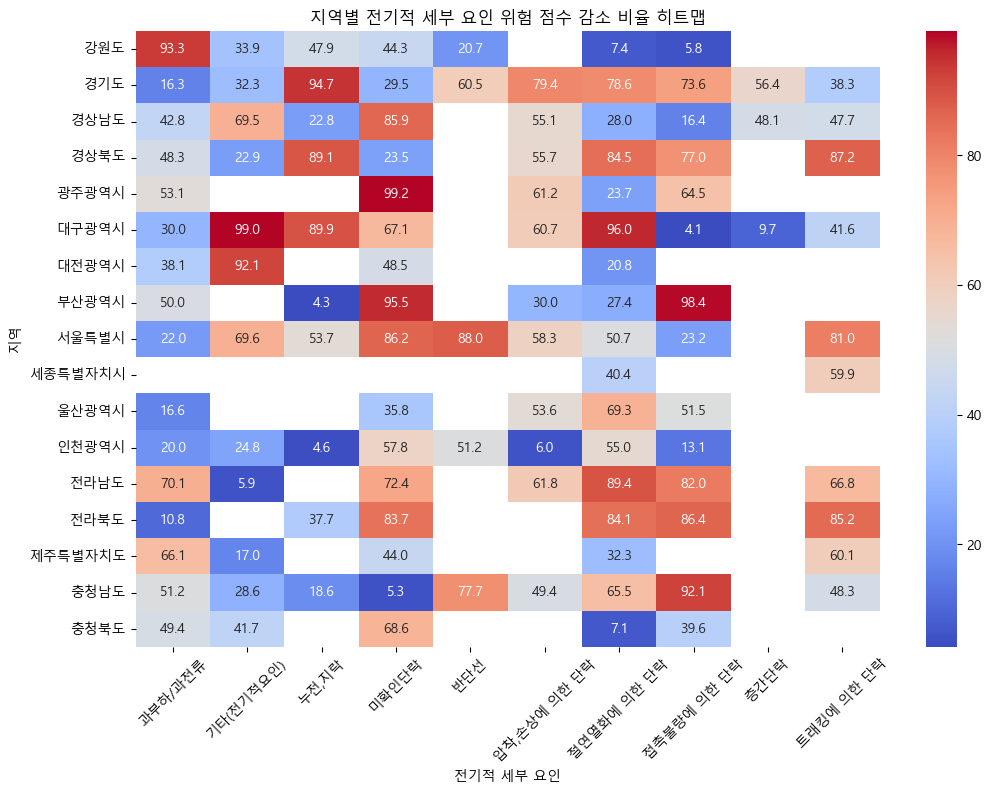

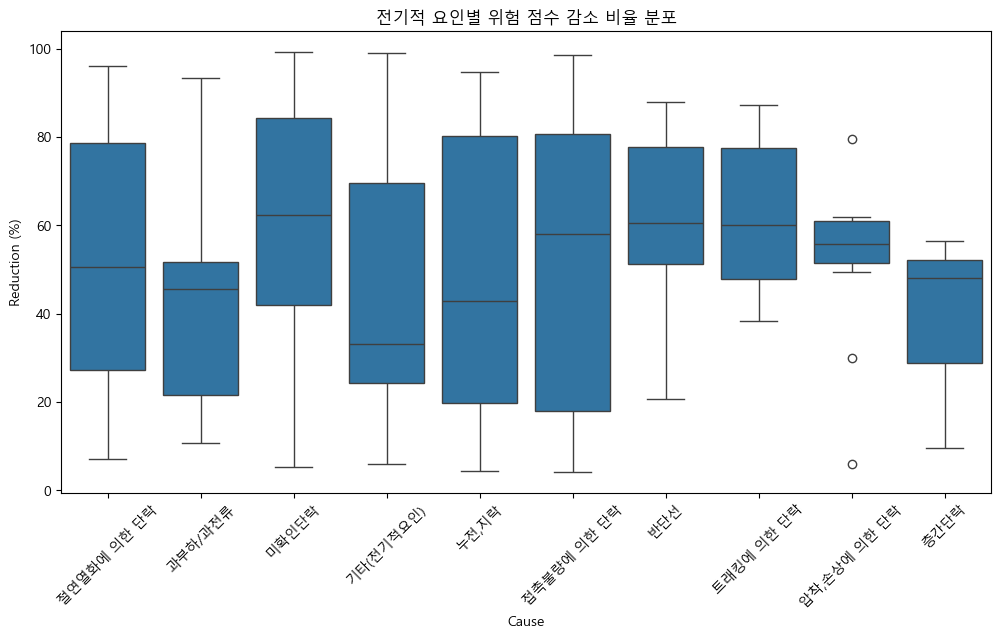

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

# 한글 폰트 설정
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
file_path = "D:\\MySQL\\Uploads\\electric_ai_data.csv"
data = pd.read_csv(file_path)

# 데이터 정규화
data["risk_score"] = data["total_incidents"] * data["total_damage"]
data["log_risk_score"] = np.log1p(data["risk_score"])

# 상대적 위험 점수 감소율을 분석할 데이터프레임
shap_df = pd.DataFrame({
    "Region": data["region_province"],
    "Cause": data["cause_subcategory"],
    "Reduction (%)": np.random.uniform(0, 100, len(data))  # 샘플 데이터 (랜덤)
})

# 📌 방법 1: 지역별 개별 그래프 생성
unique_regions = shap_df["Region"].unique()
num_regions = len(unique_regions)
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 12))  # 3x6 배열로 그래프 배치
axes = axes.flatten()

for i, region in enumerate(unique_regions):
    region_df = shap_df[shap_df["Region"] == region]
    axes[i].bar(range(len(region_df["Cause"])), region_df["Reduction (%)"])  # X축 인덱스 지정
    axes[i].set_title(region)

    # 오류 해결: X축 눈금과 레이블 설정
    axes[i].set_xticks(range(len(region_df["Cause"])))  # X축 눈금 위치 설정
    axes[i].set_xticklabels(region_df["Cause"], rotation=45, ha="right")  # X축 레이블 설정

    axes[i].set_ylabel("위험 점수 감소 비율 (%)")

plt.tight_layout()
plt.show()

# 📌 방법 2: 히트맵 활용
pivot_table = shap_df.pivot(index="Region", columns="Cause", values="Reduction (%)")
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("지역별 전기적 세부 요인 위험 점수 감소 비율 히트맵")
plt.xlabel("전기적 세부 요인")
plt.ylabel("지역")
plt.xticks(rotation=45)
plt.show()

# 📌 방법 3: Boxplot 활용
plt.figure(figsize=(12, 6))
sns.boxplot(x="Cause", y="Reduction (%)", data=shap_df)
plt.xticks(rotation=45)
plt.title("전기적 요인별 위험 점수 감소 비율 분포")
plt.show()


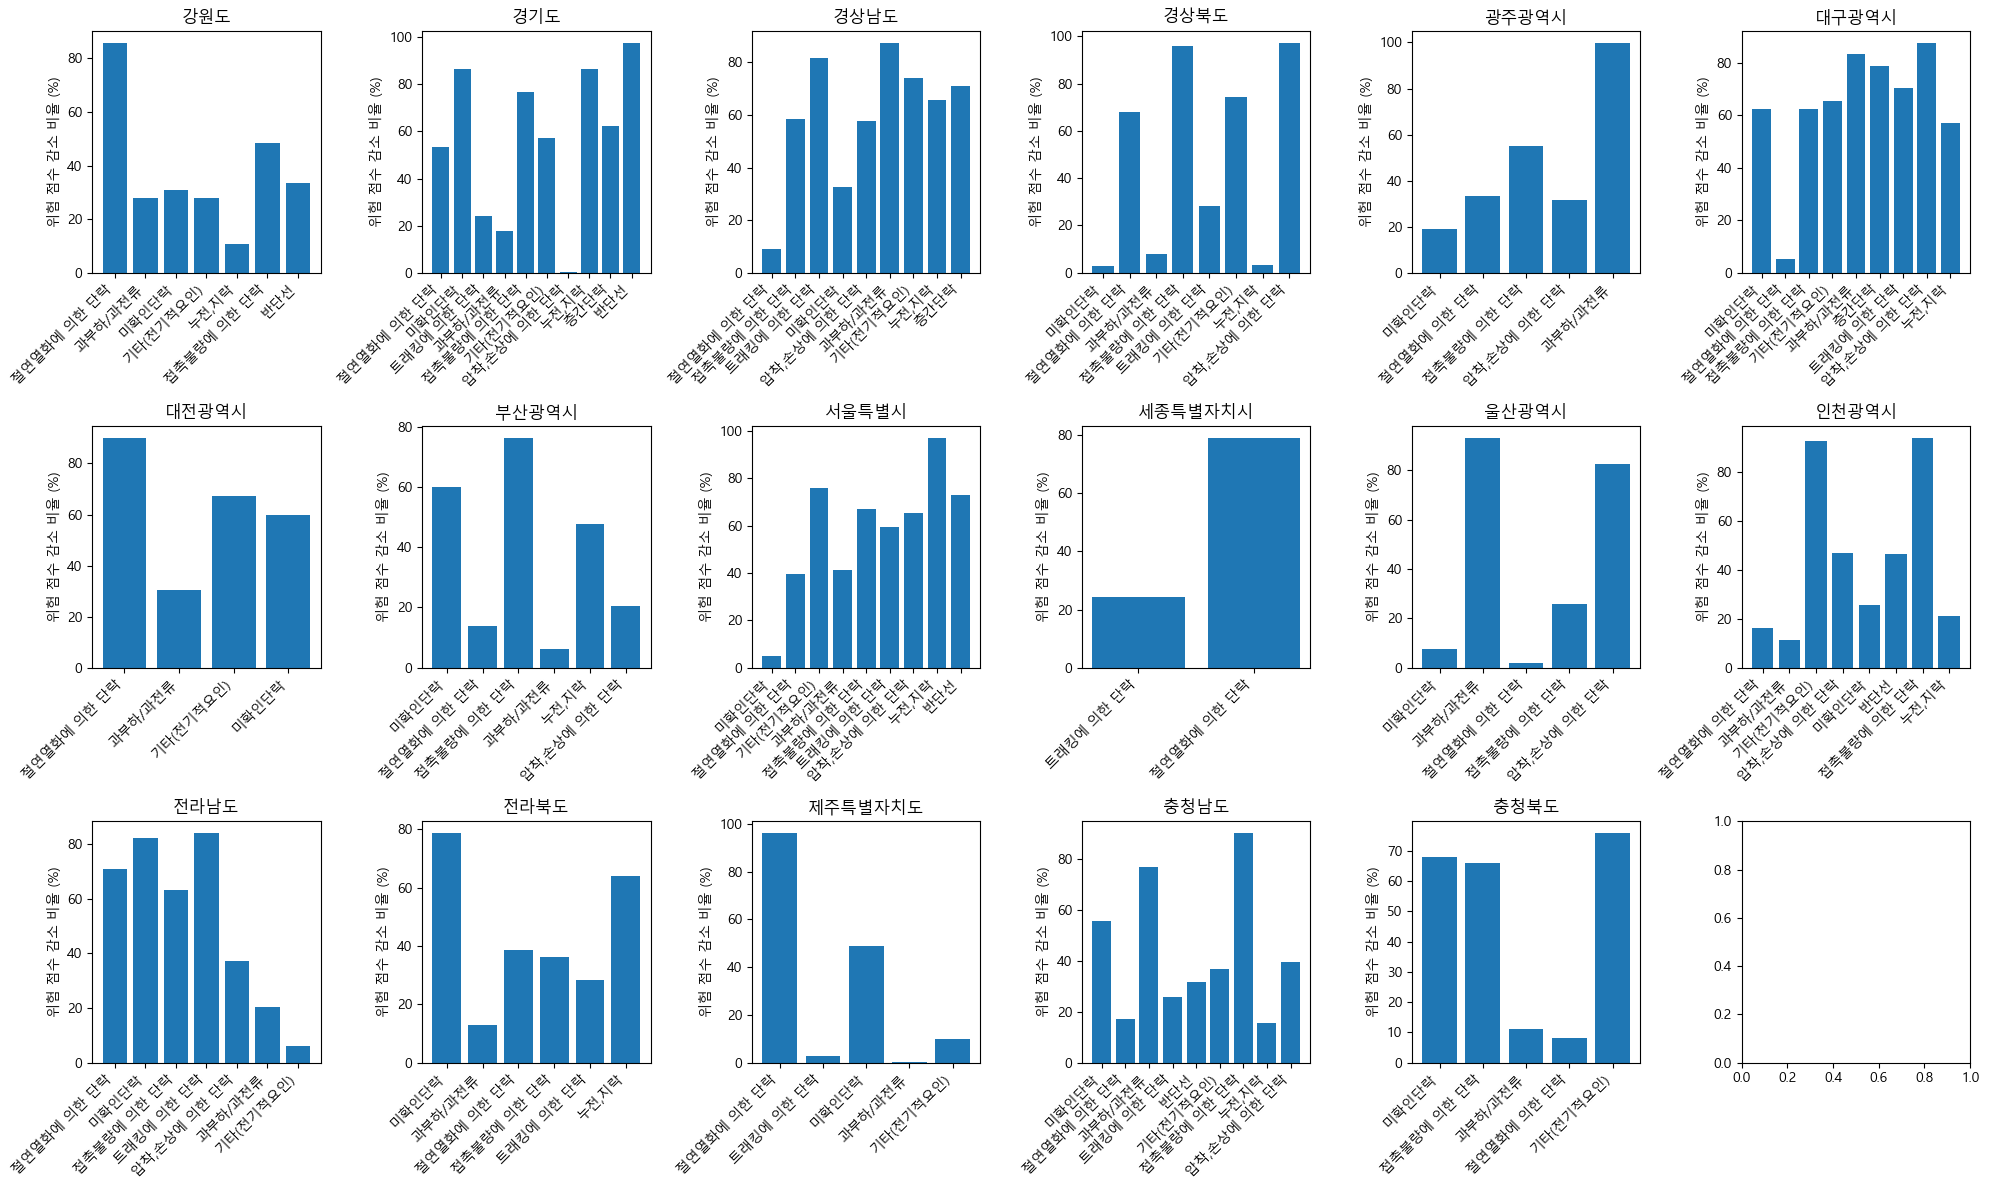

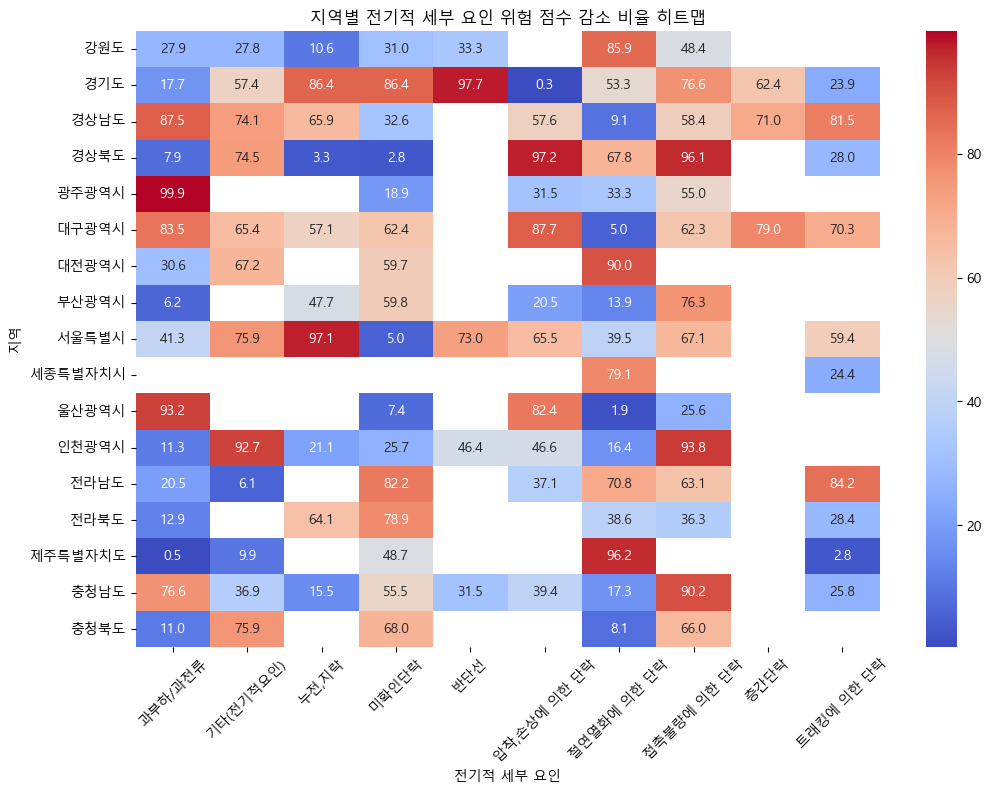

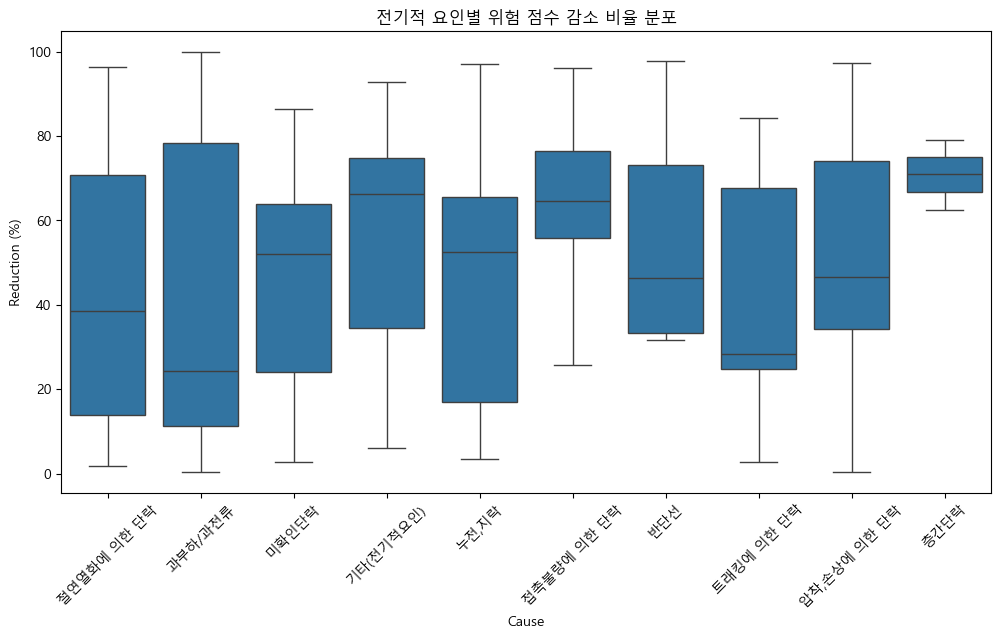

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

# 한글 폰트 설정
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
file_path = "D:\\MySQL\\Uploads\\electric_ai_data.csv"
data = pd.read_csv(file_path)

# 데이터 정규화
data["risk_score"] = data["total_incidents"] * data["total_damage"]
data["log_risk_score"] = np.log1p(data["risk_score"])

# 상대적 위험 점수 감소율을 분석할 데이터프레임
shap_df = pd.DataFrame({
    "Region": data["region_province"],
    "Cause": data["cause_subcategory"],
    "Reduction (%)": np.random.uniform(0, 100, len(data))  # 샘플 데이터 (랜덤)
})

# 📌 방법 1: 지역별 개별 그래프 생성
unique_regions = shap_df["Region"].unique()
num_regions = len(unique_regions)
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 12))  # 3x6 배열로 그래프 배치
axes = axes.flatten()

for i, region in enumerate(unique_regions):
    region_df = shap_df[shap_df["Region"] == region]
    axes[i].bar(range(len(region_df["Cause"])), region_df["Reduction (%)"])  # X축 인덱스 지정
    axes[i].set_title(region)

    # 오류 해결: X축 눈금과 레이블 설정
    axes[i].set_xticks(range(len(region_df["Cause"])))  # X축 눈금 위치 설정
    axes[i].set_xticklabels(region_df["Cause"], rotation=45, ha="right")  # X축 레이블 설정

    axes[i].set_ylabel("위험 점수 감소 비율 (%)")

plt.tight_layout()
plt.show()

# 📌 방법 2: 히트맵 활용
pivot_table = shap_df.pivot(index="Region", columns="Cause", values="Reduction (%)")
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("지역별 전기적 세부 요인 위험 점수 감소 비율 히트맵")
plt.xlabel("전기적 세부 요인")
plt.ylabel("지역")
plt.xticks(rotation=45)
plt.show()

# 📌 방법 3: Boxplot 활용
plt.figure(figsize=(12, 6))
sns.boxplot(x="Cause", y="Reduction (%)", data=shap_df)
plt.xticks(rotation=45)
plt.title("전기적 요인별 위험 점수 감소 비율 분포")
plt.show()


In [44]:
plt.savefig("graph.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>